# Please Note: The second part is appended to the end of the original notebook.

# **PCA and t-SNE Project: Auto MPG**

# **Marks: 30**

Welcome to the project on PCA and t-SNE. In this project, we will be using the **auto-mpg dataset**.


-----------------------------
## **Context**
-----------------------------

The shifting market conditions, globalization, cost pressure, and volatility are leading to a change in the automobile market landscape. The emergence of data, in conjunction with machine learning in automobile companies, has paved a way that is helping bring operational and business transformations.

The automobile market is vast and diverse, with numerous vehicle categories being manufactured and sold with varying configurations of attributes such as displacement, horsepower, and acceleration. We aim to find combinations of these features that can clearly distinguish certain groups of automobiles from others through this analysis, as this will inform other downstream processes for any organization aiming to sell each group of vehicles to a slightly different target audience.

You are a Data Scientist at SecondLife which is a leading used car dealership with numerous outlets across the US. Recently, they have started shifting their focus to vintage cars and have been diligently collecting data about all the vintage cars they have sold over the years. The Director of Operations at SecondLife wants to leverage the data to extract insights about the cars and find different groups of vintage cars to target the audience more efficiently.

-----------------------------
## **Objective**
-----------------------------
The objective of this problem is to **explore the data, reduce the number of features by using dimensionality reduction techniques like PCA and t-SNE, and extract meaningful insights**.

-----------------------------
## **Dataset**
-----------------------------
There are 8 variables in the data:

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from 0 to 60 mph (sec.)
- yr: model year
- car name: car model name

# Part 1

## **Importing the necessary libraries and overview of the dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Libraries:

These are the basic libraries needed for importing and perfroming Exploratory Data Analysis on the dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### **Loading the data**

In [3]:
autodev = pd.read_csv('/content/drive/MyDrive/auto-mpg.csv')
autodev.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


### **Data Overview**

- Observations:

1) Car Names is a categorical feature, but still has value in recommending which vehicle might be suitable given a buyer's preferences, so it has not been permanently dropped, merely excluded from numerical operations.
2) The age of the car is more pertinent than the year of the model, and more appropriate for data manipulation, so the model year was converted, and the original series dropped.
3) K-means clustering will be used to model this dataset. However, it may also lend itself to linear regression modeling.
- Sanity checks






## **Data Preprocessing and Exploratory Data Analysis**


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- Missing value treatment
- Feature engineering (if needed)
- Check the correlation among the variables
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)



In [4]:
print('This is the first information:\n', autodev.head())

print('\nThis is the number of null values:\n', autodev.isnull().sum(), '\n')

print('This is the information:\n', autodev.info(), '\n')

print('This is the description:\n', autodev.describe(), '\n')

This is the first information:
     mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

                    car name  
0  chevrolet chevelle malibu  
1          buick skylark 320  
2         plymouth satellite  
3              amc rebel sst  
4                ford torino  

This is the number of null values:
 mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
car name        0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 colum

Observations: The maximum fuel efficiency (FE) is 46 mpg, while the minimum is 23.5 mpg. At least 75% of the vehicles in this dataset have a fuel efficiency of 29 mpg or less. The average mpg is 23.5 mpg, and there is a standard deviation of 7.8, which means that 68% of the cars have an FE between 15.68 and 31.33 mpg. This points to the max mpg of 46.6 mpg as possibly being an outlier.

Other features will be discussed as they pertain to the fuel efficiency of the different cars.

### **Summary Statistics**

In [5]:
pd.set_option('display.max_columns', None)

print('This is the unique values for horsepower:\n', autodev["horsepower"].unique(), '\n')

print('These are the entries that I will drop:\n', autodev[autodev['horsepower']=='?'].value_counts(), '\n')

This is the unique values for horsepower:
 ['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82'] 

These are the entries that I will drop:
 mpg   cylinders  displacement  horsepower  weight  acceleration  model year  car name            
21.0  6          200.0         ?           2875    17.0          74          ford maverick           1
23.0  4          151.0         ?           3035    20.5          82          amc concord dl          1
23.6  4          140.0         ?           2905    14.3          80          ford mu

Since there are only 6 missing values, we will drop them.

In [6]:
autodev1 = autodev[autodev['horsepower'] != '?']
autodev1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


Next, we change the horsepower data type.

In [7]:
autodev1['horsepower'] = autodev1['horsepower'].astype(int)

print('This is the new information:\n', autodev1.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   car name      392 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 27.6+ KB
This is the new information:
 None 



I decided to create a column that shows the number of times a particualr model is repeated, to give these models more weight. I also created a column for the car's age, rather than their year of manufacture.

In [8]:
car_name1 = autodev1['car name'].value_counts()
autodev1['car_name2'] = autodev1['car name'].map(car_name1)
autodev1['model_age1'] = 2025 - (1900 + autodev1['model year'])

autodev1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,car_name2,model_age1
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,2,55
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,1,55
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,1,55
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,1,55
4,17.0,8,302.0,140,3449,10.5,70,ford torino,1,55


Univariate Analysis:
First, I set up the histogram_boxplot function.

In [9]:
def histogram_boxplot(data, feature, figsize=(12,7), kde=True, bins=None):
    figure, (ax_box, ax_hist) = plt.subplots(2, sharex=False, figsize=figsize)
    #sns.axes_style('darkgrid')
    #sns.set_style('darkgrid')
    figure.set_facecolor('black')

    plt.title(feature, color='white')

    #plt.xticks(rotation= 90, color='white')
    #plt.yticks(color='white')
    #plt.xlabel(feature, color='white')
    #plt.ylabel('count', color='white')

    sns.boxplot(data=data, x=feature, ax=ax_box, showmeans=True, color='violet')
    if bins == None:
        sns.set_style('dark')
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist)
    else:
        sns.set_style('dark')
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist, bins=bins)

    ax_hist.axvline(data[feature].mean(), color='green', linestyle='--')
    ax_hist.axvline(data[feature].median(), color='black', linestyle='-')

    plt.xticks(rotation=0, color='white')
    plt.yticks(color='white')
    plt.xlabel(feature, color='white')
    plt.ylabel('count', color='white')

    plt.show()


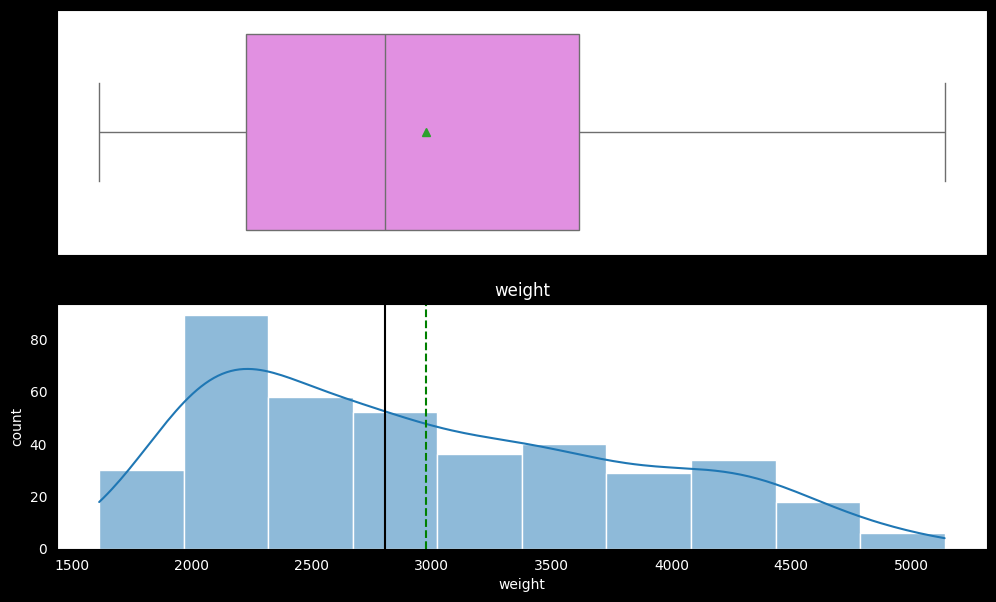

In [10]:

#continuous variables
histogram_boxplot(autodev1, 'weight')



Most vehicles are about 2200 pounds, right above the 25th quartile.

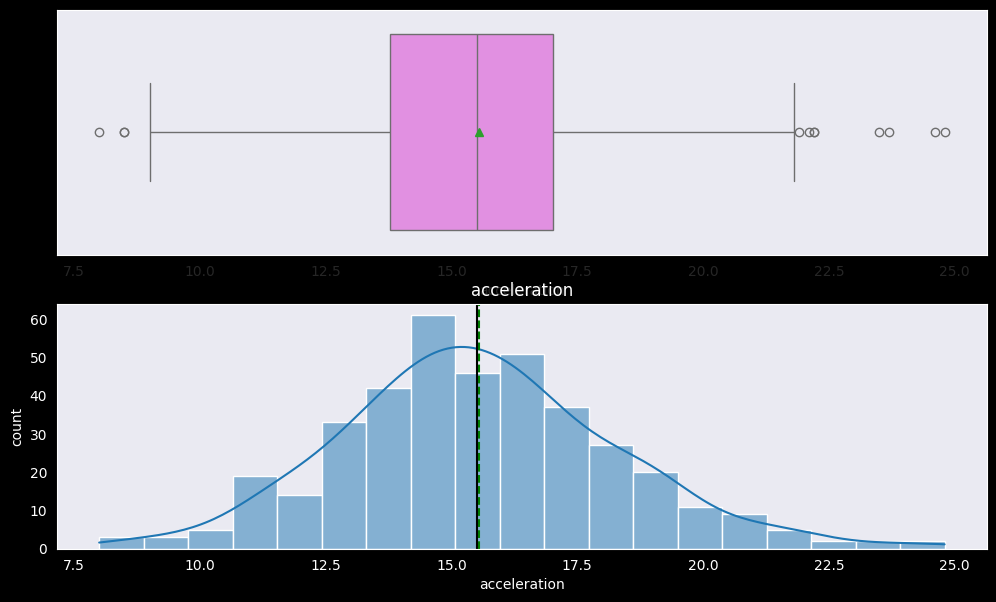

In [11]:
histogram_boxplot(autodev1, 'acceleration')



Most of the cars have an acceleration time of about 15.7 seconds. This is a curve that is close to a Gaussian curve, meaning that 68% of the cars fall within one standard deviation, and 95% of the cars fall within two stardard deviations from the mean. The mean is 15.56 seconds, and the standard deviation is 2.76 seconds, so most of the cars have accelerations between 12.94 and 18.46 seconds.

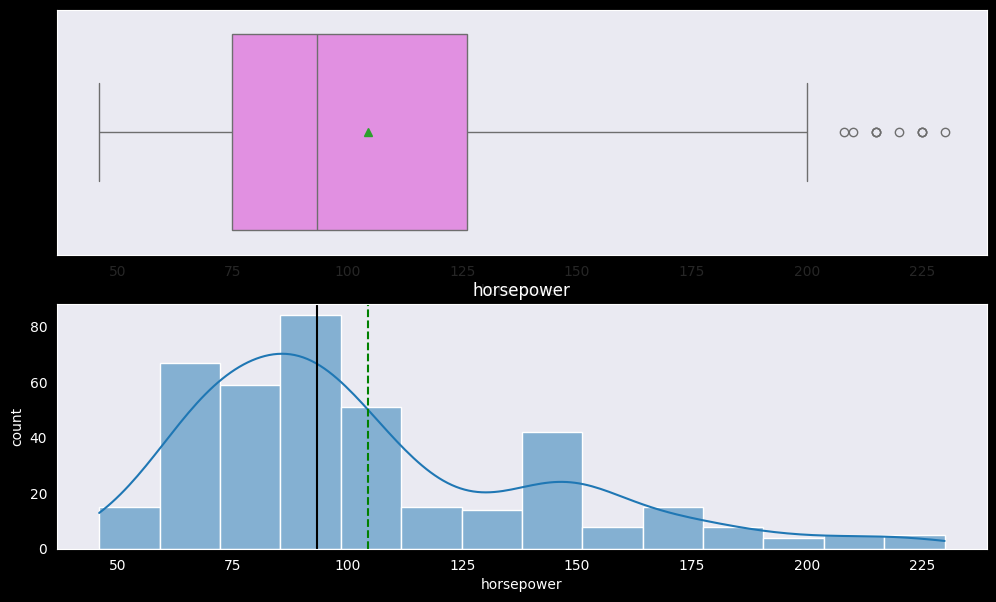

In [12]:
histogram_boxplot(autodev1, 'horsepower')



There are two main peaks in horsepower, presumably one for smaller vehicles with a higher number of cylinders, and the other for larger vehicles with a higher number of cylinders.

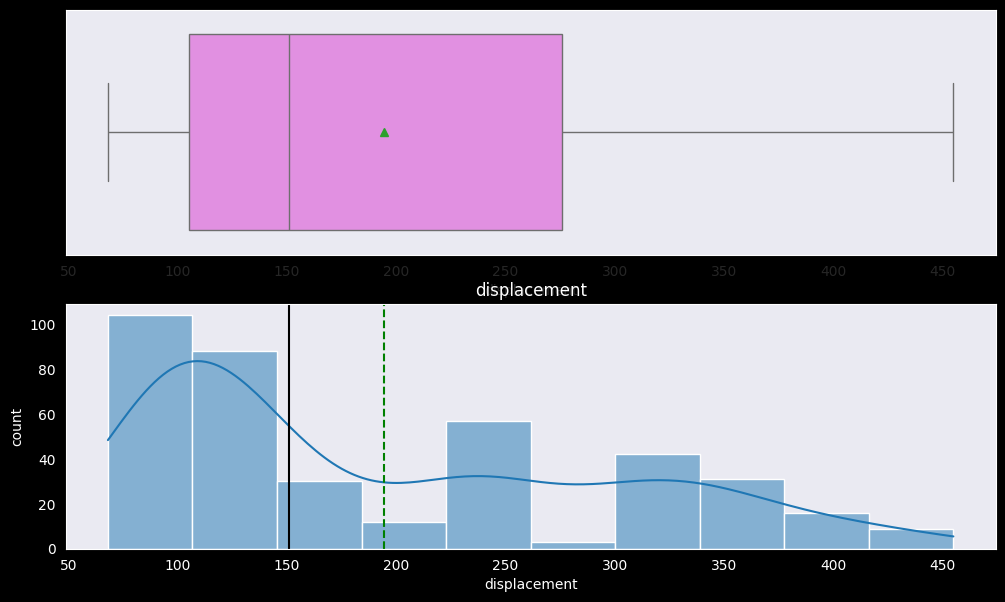

In [13]:
histogram_boxplot(autodev1, 'displacement')



The displacement should be directly correlated to the horsepower and number of cylinders. About one quarter of the vehicles have the highest horsepower. The data id skewed to the right, telling us that less cars with a high displacement are in the dataset. 50% of the cars have a displacement of 150 cc.

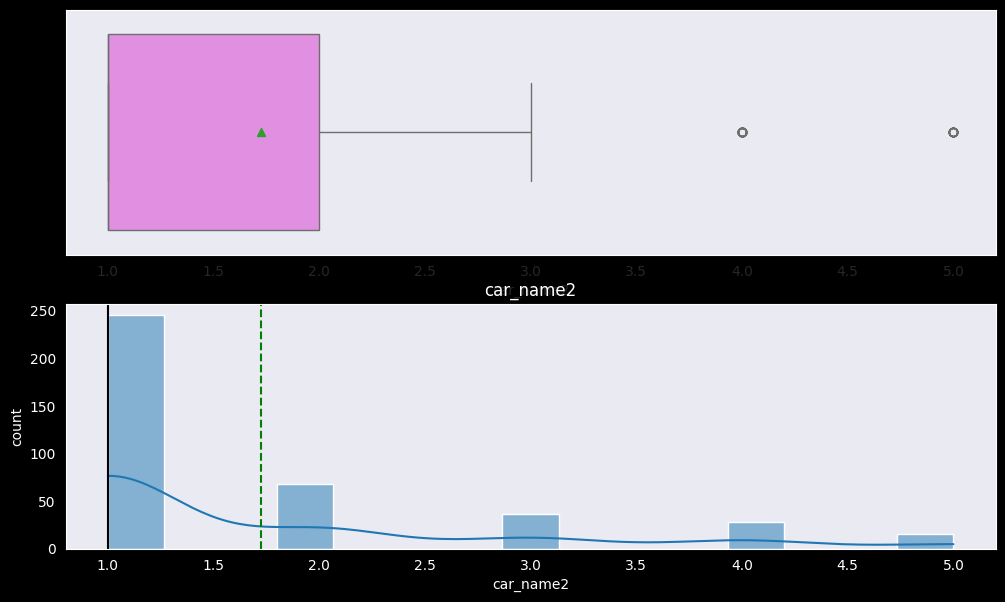

In [14]:
histogram_boxplot(autodev1, 'car_name2')




A little more than half of the cars only have instances of one in this dataset.

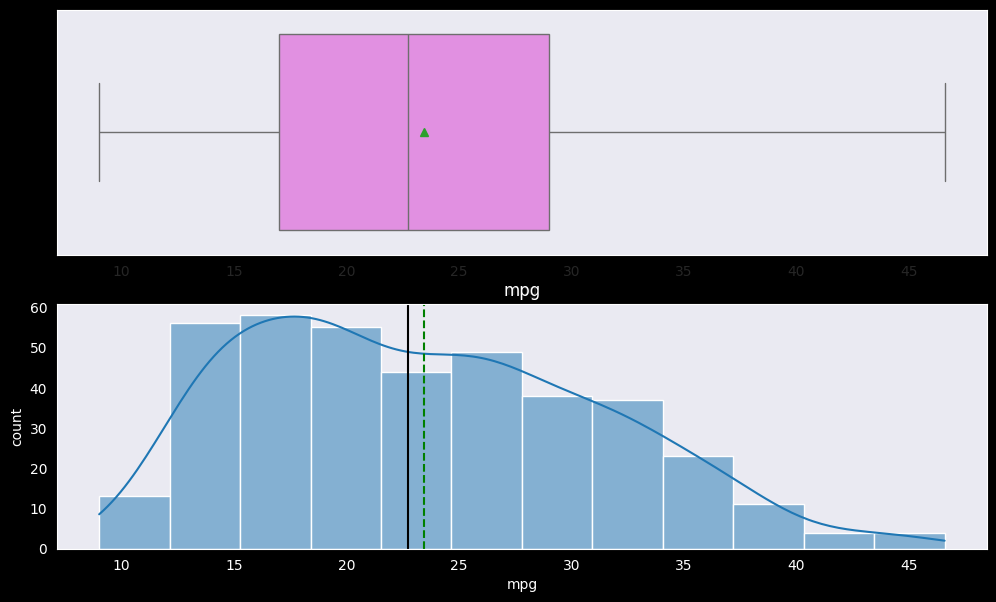

In [15]:
histogram_boxplot(autodev1, 'mpg')


The miles per gallon has two peaks, one at 17 mpg and the other at 24 mpg. The most cars with the 17 mpg is at the 25th percentile. The data has a skew to the right.

More Analysis

In [16]:

def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])
    count = data[feature].nunique()
    #
    if n is None:
        plt.figure(figsize=(count + 1, 5), facecolor='black')
        #plt.title(feature, color='white')
        plt.xticks(rotation=0, fontsize=15, color='white')
        plt.yticks(fontsize=15, color='white')
        plt.xlabel(feature, color='white')
        plt.ylabel('count', color='white')
    else:
        plt.figure(figsize=(n + 1, 5), facecolor='black')
        #plt.title(feature, color='white')
        plt.xticks(rotation=0, fontsize=15, color='white')
        plt.yticks(fontsize=15, color='white')
        plt.xlabel(feature, color='white')
        plt.ylabel('count', color='white')

    sns.axes_style('darkgrid')
    sns.set_style('darkgrid')

    sns.set_style('dark')
    ax = sns.countplot(
        data=data,
        x=feature,
        palette='Paired',
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    ax.xaxis.set_ticklabels(ax.get_xticklabels(), rotation=0, color='white')
    ax.yaxis.set_ticklabels(ax.get_yticklabels(), rotation=0, color='white')

    for p in ax.patches:
        if perc == True:
            label = '{:.1f}%'.format(
                100*p.get_height()/total
            )
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width()/2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha='center',
            va='center',
            #color='white',
            size=12,
            xytext=(0,5),
            textcoords='offset points',
        )
    plt.show()



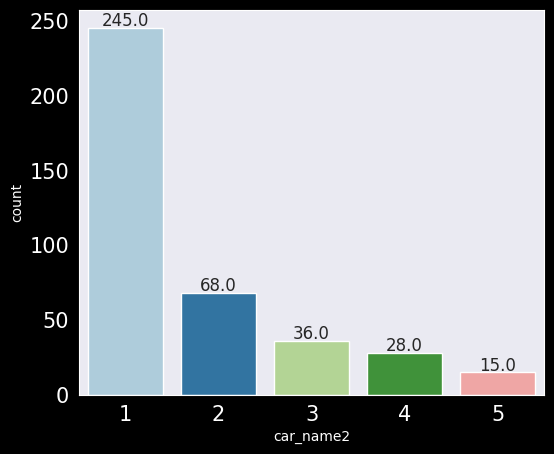

In [17]:
labeled_barplot(autodev1, 'car_name2')


245 cars are listed only once in this dataset. 68 are listed twice. 36 are listed three times. 28 are listed four times and 15 are listed five times.

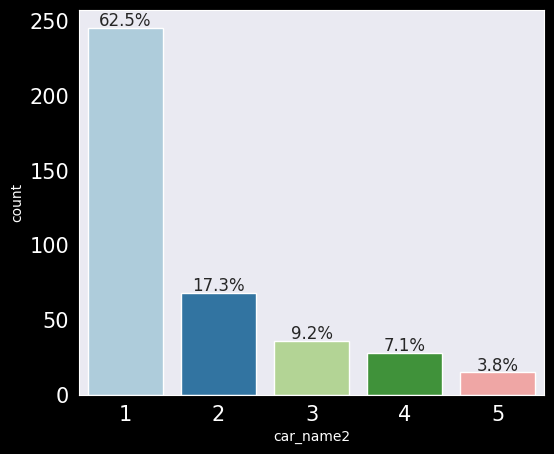

In [18]:

labeled_barplot(autodev1, 'car_name2', perc=True)



62.5% of the cars are only listed once

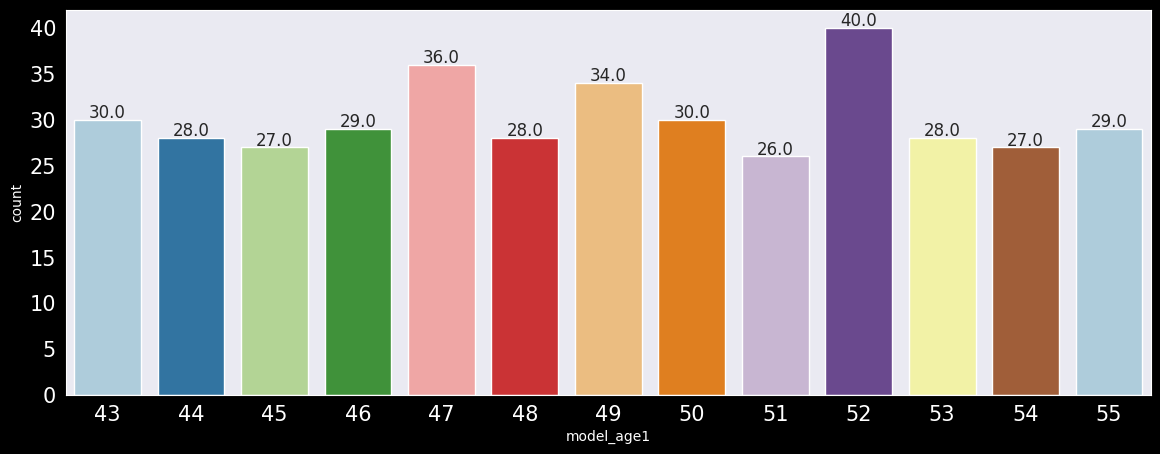

In [19]:
labeled_barplot(autodev1, 'model_age1')


The age of cars with the most examples in this dataset are 52 years old.

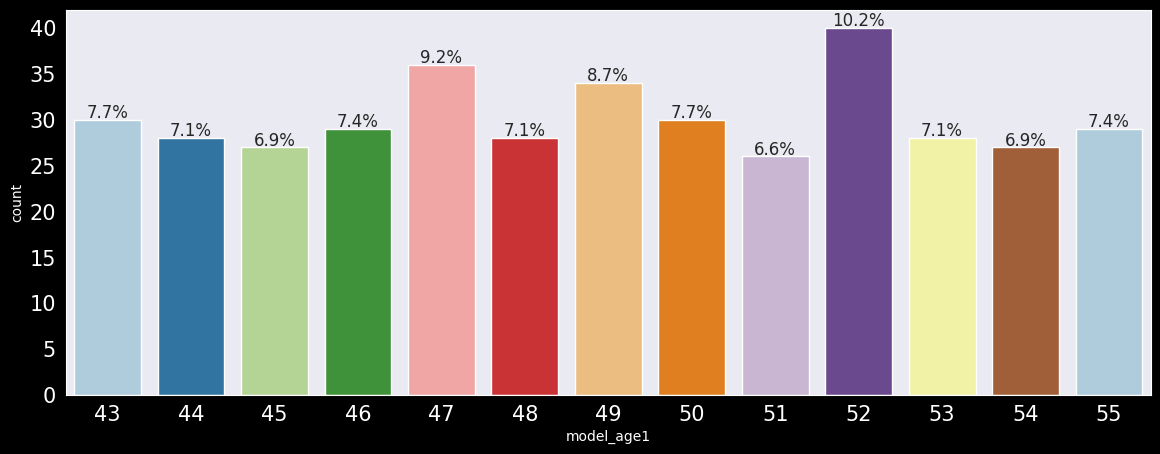

In [20]:
labeled_barplot(autodev1, 'model_age1', perc=True)



The age of cars with the most examples in this dataset are 52 years old.

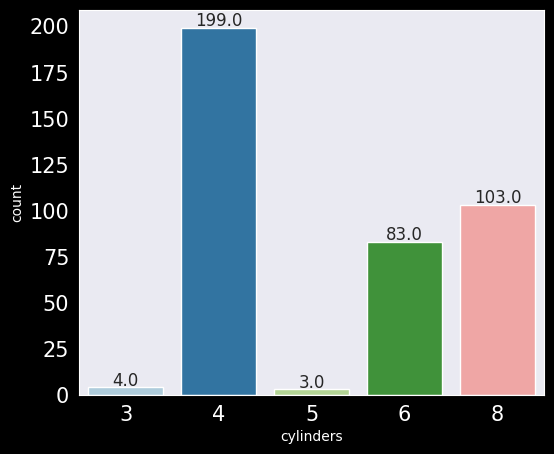

In [21]:
labeled_barplot(autodev1, 'cylinders')



The majority of cars, 50.8% have 4 cylinders.

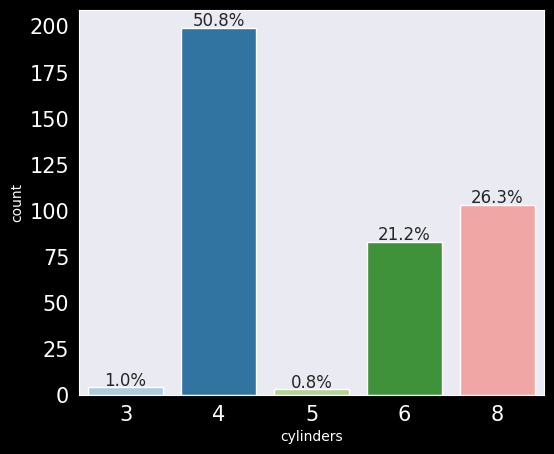

In [22]:
labeled_barplot(autodev1, 'cylinders', perc=True)

Bivariate Analysis

In [23]:
def labeled_barplot1(data, feature, target, perc=False, n=None):
    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5), facecolor='black')
    else:
        plt.figure(figsize=(n + 1, 5), facecolor='black')

    #plt.title(target, 'vs', feature, color='white')
    plt.xticks(rotation=0, fontsize=15, color='white')
    plt.yticks(fontsize=15, color='white')
    plt.xlabel(feature, color='white')
    plt.ylabel(target, color='white')
    sns.set_style('dark')
    ax = sns.barplot(
        data=data,
        x=feature,
        y=target,
        palette='Paired',
        order=data[feature].value_counts().index[:n].sort_values(),
        #edgecolor='black',
    )

    for p in ax.patches:
        if perc == True:
            label = '{:.1f}%'.format(
                100*p.get_height()/total
            )
        else:
            label = '{:.3f}'.format(p.get_height())

        x = p.get_x() + p.get_width()/2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            #ha='center',
            va='center',
            size=12,
            xytext=(0,5),
            textcoords='offset points',
        )
    plt.show()


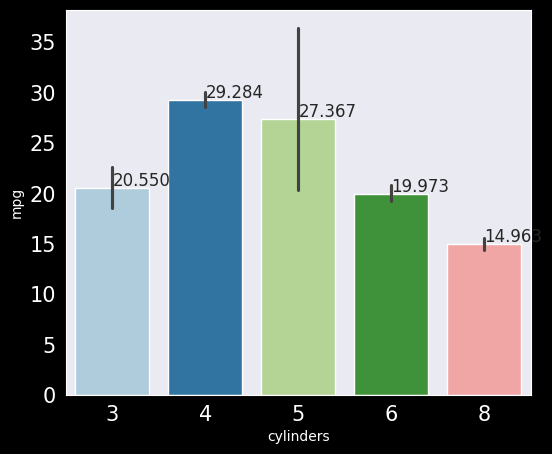

In [24]:
labeled_barplot1(autodev1, 'cylinders', 'mpg')


Four cylinder cars are the most fuel-efficient, with an average mpg of 29.28 mpg.

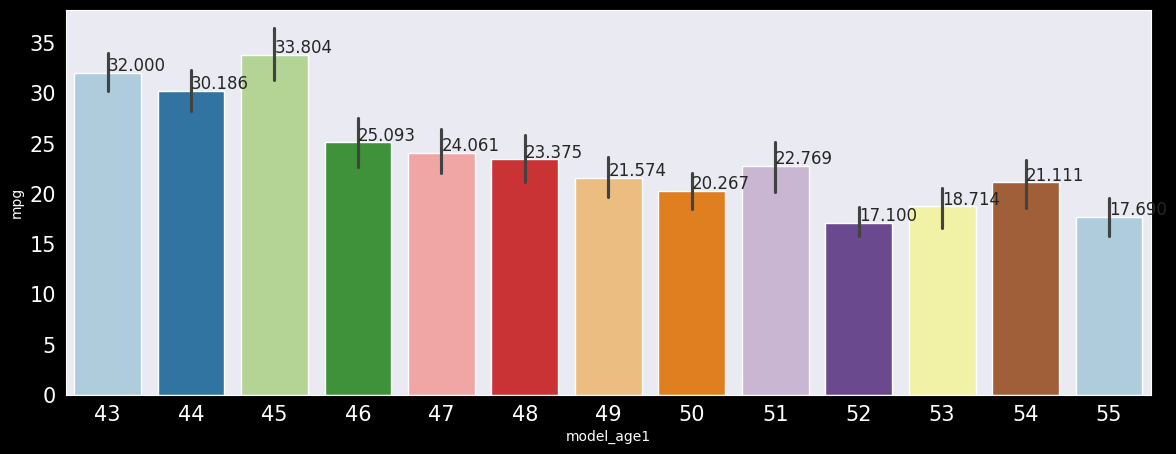

In [25]:
labeled_barplot1(autodev1, 'model_age1', 'mpg')


Of the older cars, cars that are 45 years old are the most fuel-efficient.

More bivariate analysis

In [26]:
def labeled_lineplot(data, feature, target, perc=False, n=None):
    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(10, 8), facecolor='black')
    else:
        plt.figure(figsize=(n + 1, 5), facecolor='black')

    plt.title(f"{target} vs {feature}", color='white')
    plt.xticks(rotation=0, fontsize=15, color='white')
    plt.yticks(fontsize=15, color='white')
    plt.xlabel(feature, color='white')
    plt.ylabel(target, color='white')
    sns.set_style('dark')
    ax = sns.lineplot(
        data=data,
        x=feature,
        y=target,
        palette='Paired'
        #order=data[feature].value_counts().index[:n].sort_values(),
        #edgecolor='black',
    )

    for p in ax.patches:
        if perc == True:
            label = '{:.1f}%'.format(
                100*p.get_height()/total
            )
        else:
            label = '{:.3f}'.format(p.get_height())

        x = p.get_x() + p.get_width()/2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            #ha='center',
            va='center',
            size=12,
            xytext=(0,5),
            textcoords='offset points',
        )
    plt.show()

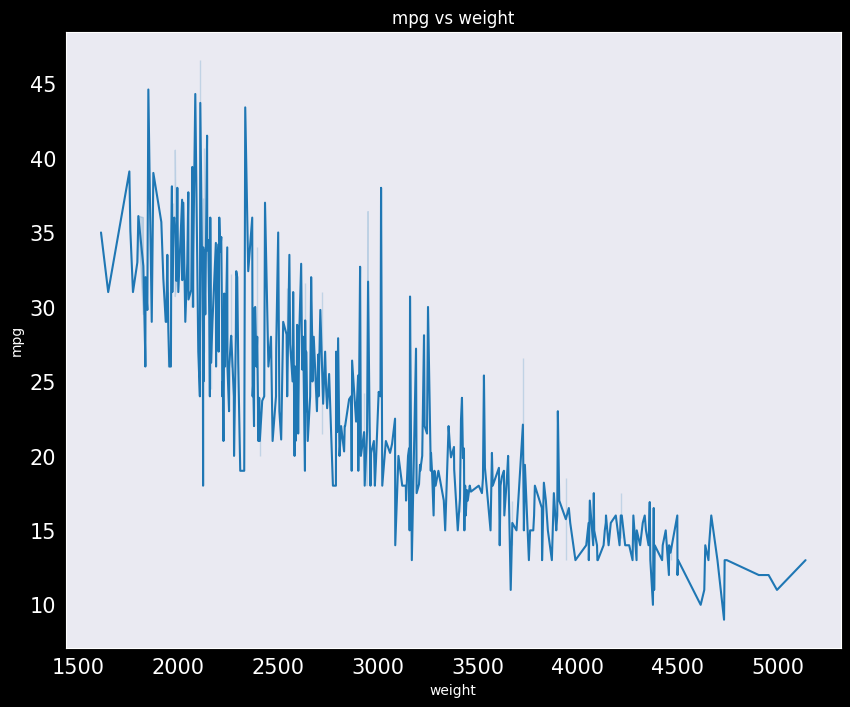

In [27]:
labeled_lineplot(autodev1, 'weight', 'mpg')



The lighter the car, the more fuel-efficient it is.

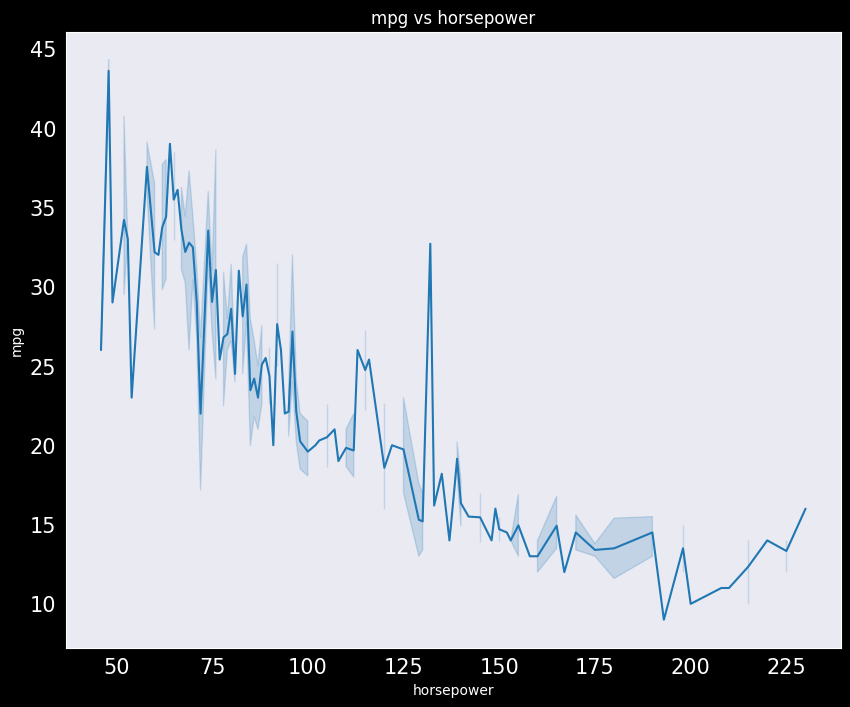

In [28]:
labeled_lineplot(autodev1, 'horsepower', 'mpg')



The more powerful the engine of a car, the more fuel it comsumes, and the less fuel efficient it is.

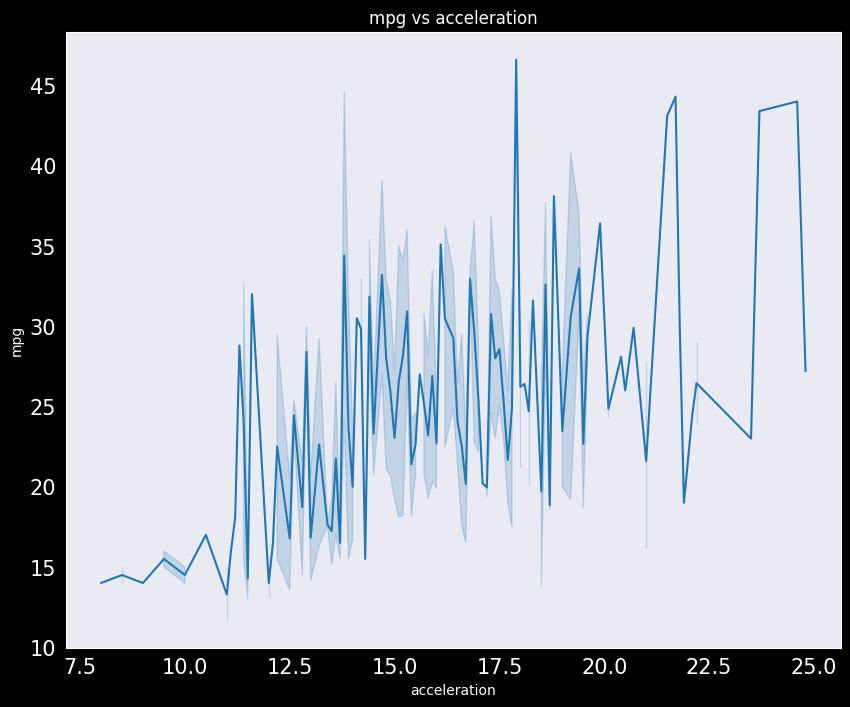

In [29]:
labeled_lineplot(autodev1, 'acceleration', 'mpg')



The faster the acceleration a car can achieve, the more fuel-efficient it is.

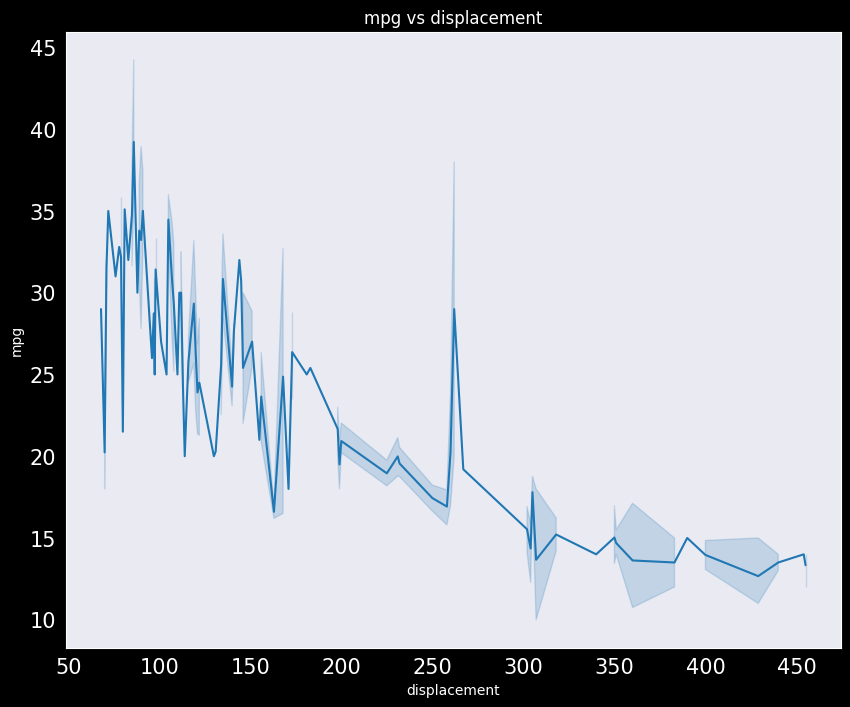

In [30]:
labeled_lineplot(autodev1, 'displacement', 'mpg')



The larger the displacement a car has, the less fuel-efficient it is.

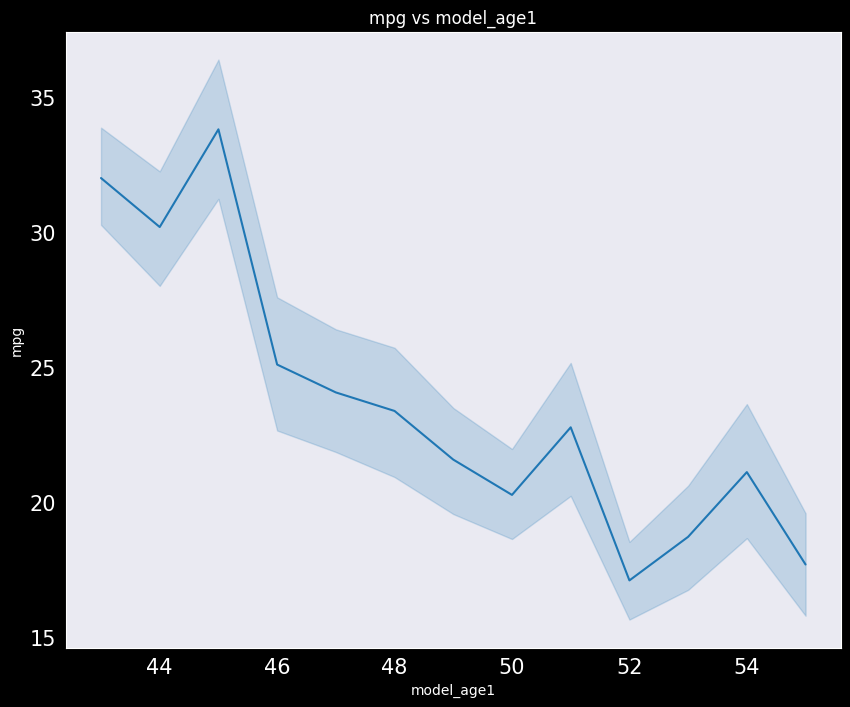

In [31]:
labeled_lineplot(autodev1, 'model_age1', 'mpg')

The older the car, the less fuel efficient it is.

In [32]:
def barplot_new(target, condition_number, head_count):
    # Define the condition: select rows where 'Category' is 'B'
    condition = autodev1['car_name2'] == condition_number

    # Filter the 'Value' column using the condition and select the first three elements
    selected_values3 = autodev1.loc[condition, 'car name'].head(head_count)

    fig, ax = plt.subplots(facecolor='black')
    sns.barplot(data=autodev1, x=selected_values3, y=target, ax=ax)
    plt.xticks(rotation=90, fontsize=8, color='white')
    plt.yticks(fontsize=8, color='white')
    plt.xlabel('car name', color='white')
    plt.ylabel(target, color='white')
    ax.bar_label(container=ax.containers[0], label_type='edge')
    plt.show()





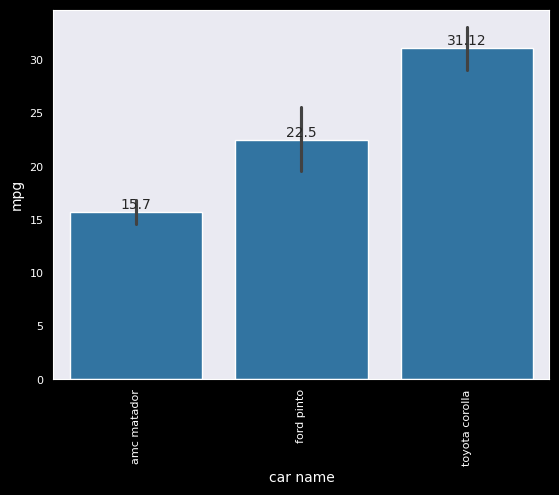

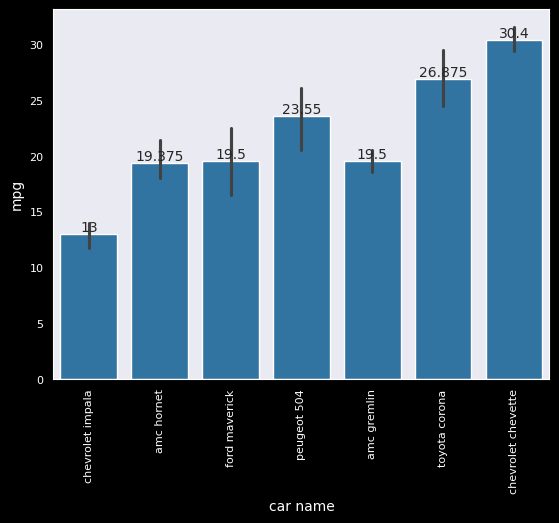

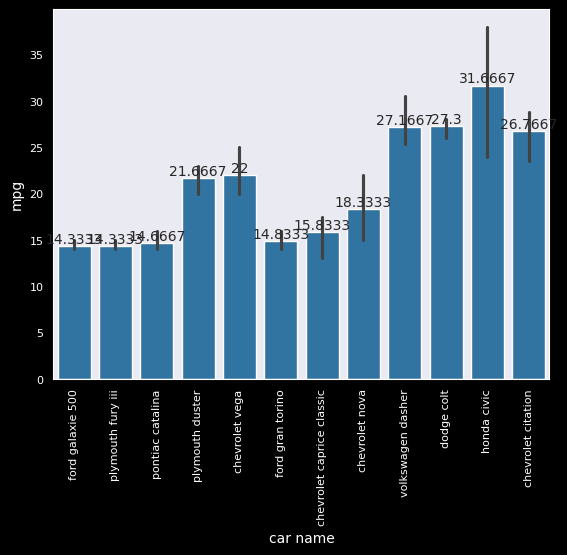

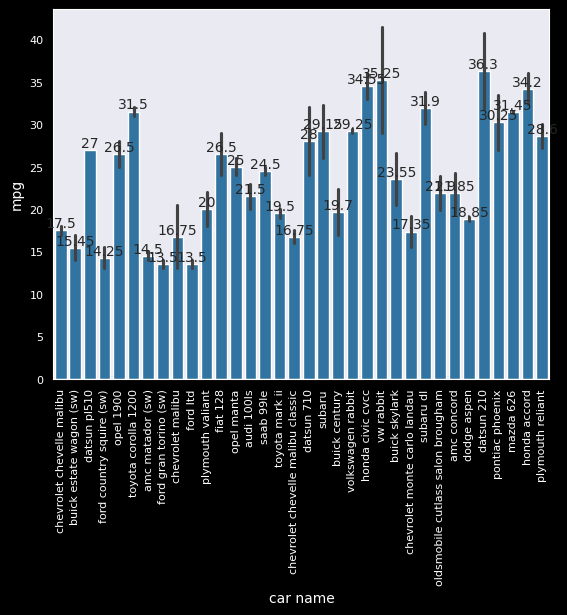

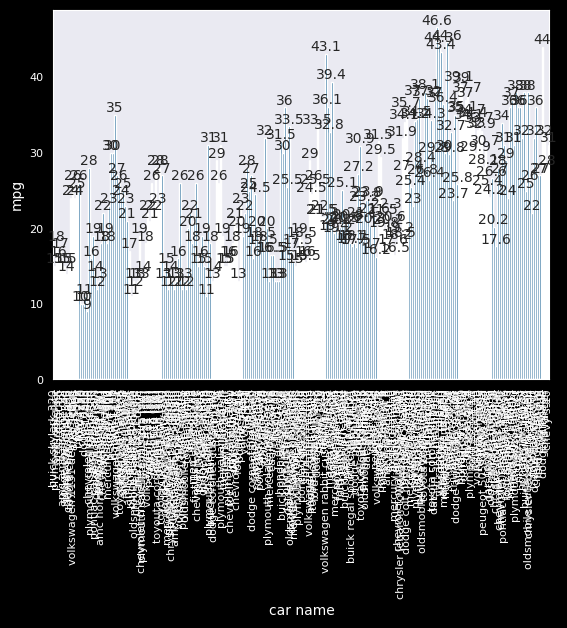

In [33]:
barplot_new('mpg', 5, 15)
barplot_new('mpg', 4, 28)
barplot_new('mpg', 3, 36)
barplot_new('mpg', 2, 68)
barplot_new('mpg', 1, 245)


For cars that appear five times, the toyota corolla is the most fuel efficient at 31.12 mpg. For cars that appear four times, the chevrolette chevelle is the most fuel efficient at 30.4 mpg. For cars that appear three times, the honda civic is the most fuel-efficient, at 31.67 mpg. For cars that appear twice, the datsun 210 is the most fuel-efficient, at 36.3. For cars that appear only once, the most fuel efficient is 46.6 mpg. More filtering will have to be performed to get the car name.

In [34]:
autodev1[autodev1['mpg'] == 46.6]['car name']

,car name
322,mazda glc


The car with the highest fuel efficiency is the mazda glc.

In [35]:
autodev2 = autodev1[['model year', 'mpg', 'displacement', 'car name']]

#use this for bivariate comparison
autodev2b = autodev1[['model year', 'car_name2', 'car name']]

autodev3 = autodev1[['model year', 'car_name2', 'car name', 'displacement', 'horsepower', 'weight']]

features = autodev1.drop(columns=autodev2, axis = 0)
print('this is the features:\n', features.head(), '\n')


target = autodev1['mpg']

feature_and_target1 = autodev1.drop(columns=autodev2b, axis = 0)

feature_and_target2 = autodev1.drop(columns=autodev3, axis = 0)


this is the features:
    cylinders  horsepower  weight  acceleration  car_name2  model_age1
0          8         130    3504          12.0          2          55
1          8         165    3693          11.5          1          55
2          8         150    3436          11.0          1          55
3          8         150    3433          12.0          1          55
4          8         140    3449          10.5          1          55 



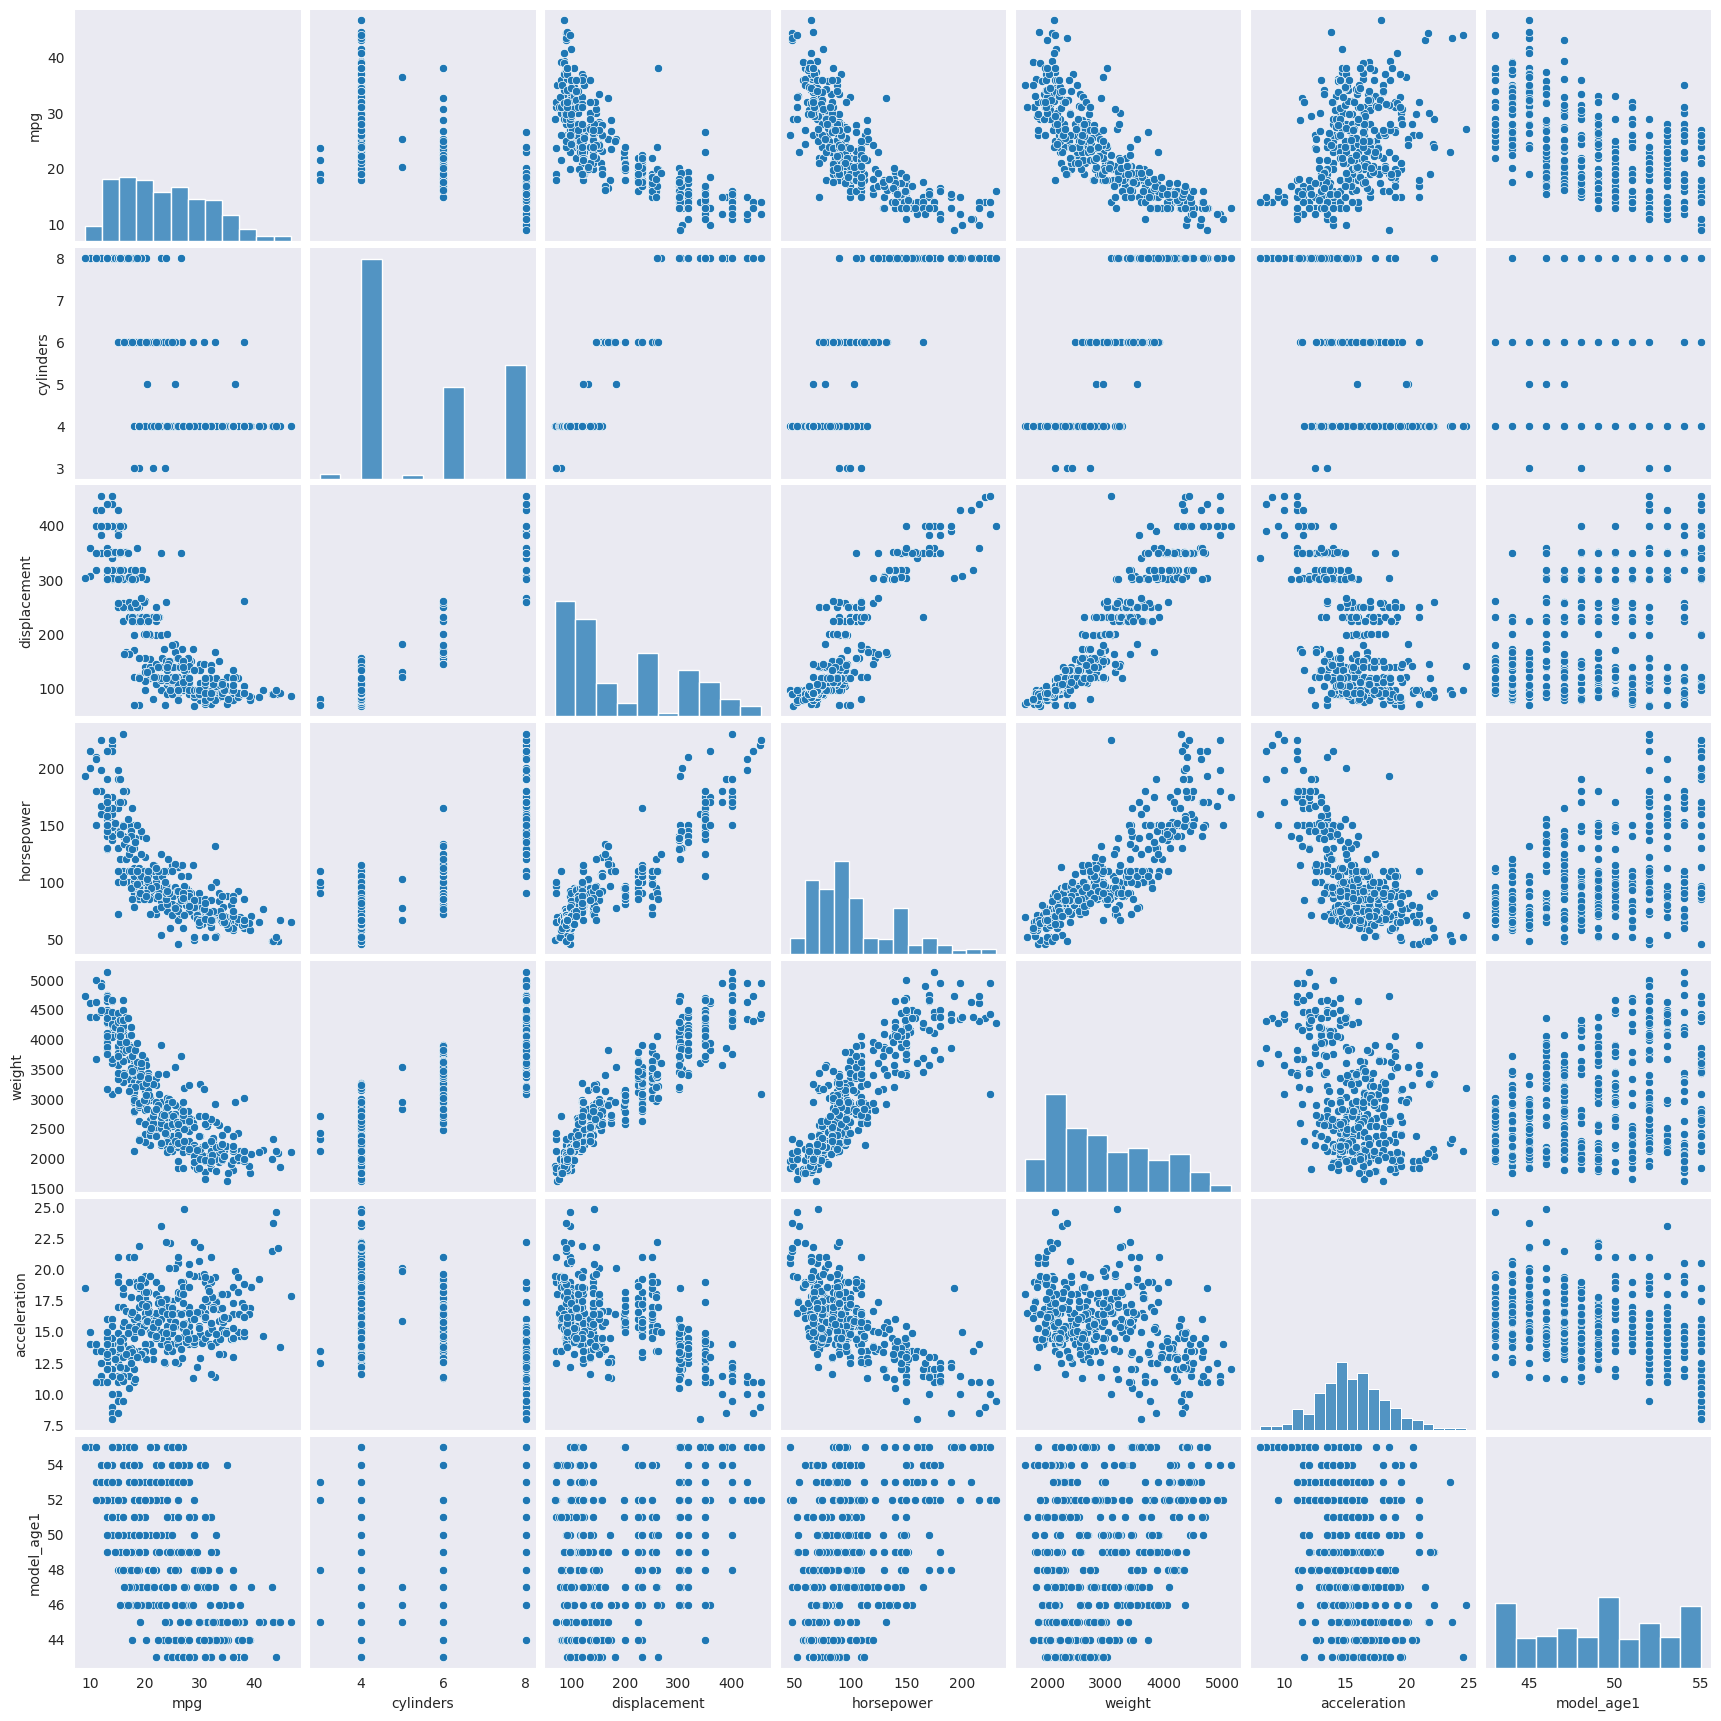

In [36]:
sns.pairplot(feature_and_target1)
plt.show()


Using the correlation function, we can see the correlations between variables even more clearly.

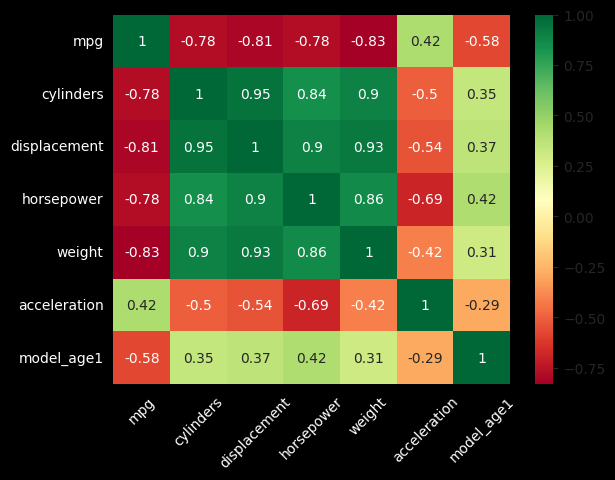

In [37]:

sns.set_style('dark')
plt.figure(facecolor='black')
sns.heatmap(feature_and_target1.corr(), annot=True, cmap='RdYlGn')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.show()


We can see that there is a strong,negative correlation between the mpg and the number of cylinders. This should hold true for displacement and horsepower, as these three variables are all related to the size of the engine in the vehicle. The bigger and more powerful the engine, the more fuel it consumes, which lowers its fuel efficiency. Likewise, the weight has a negative effect - the heavier the vehicle, the more fuel is required to make it move.

We therefore expect and find a negative correlatioin between the weight and acceleration.

Age also has a negative correlation to the fuel efficiency, as older technologies were heavier, and the grade of gasoline has changed. The grade of motor oil used to lubricate the engines has also changed, lending to the efficiency of newer cars, so the older the car, the less fuel efficient we expect it to be.

There are very strong correlations between certain variables, making the use of linear regression unfavorable. Kmeans-Clustering might provide much more interpretable and actionable results.

### **Scaling the data**

We scale the data to make them dimensionless, and also comparable in scale so that they may be compared in a meaning way.

In [38]:
from enum import auto
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

autodev2 = autodev1.copy()

autodev3 = autodev2.drop(['car name', 'model year'], axis=1)

scaler.fit(autodev3)
scaled_autodev3 = scaler.transform(autodev3)

scaled_autodev4 = pd.DataFrame(scaled_autodev3, columns=autodev3.columns)

scaled_autodev4.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,car_name2,model_age1
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,0.244376,1.625315
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-0.642619,1.625315
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-0.642619,1.625315
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-0.642619,1.625315
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-0.642619,1.625315


## **Principal Component Analysis**

Now I perform principal component analysis, especially since many of these features have strong correlations, as seen by our pairplot and correlation heatmaps. Principal Component Analysis shows how the variance is spread for the principal components. The first component is in the direction in which the data varies the most, or the spread from the mean is the biggest. The second component lies in the direction that the spread from the mean is the second biggest.

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=scaled_autodev4.shape[1], random_state=0)
pca.fit(scaled_autodev4)
pca_autodev4 = pca.transform(scaled_autodev4)

pca_autodev5 = pd.DataFrame(pca_autodev4)
pca_autodev5.head()

,0,1,2,3,4,5,6,7
0,2.640302,0.636242,0.865715,-0.172536,0.744557,-0.544286,0.106863,-0.113507
1,3.480347,-0.214243,1.235733,0.029032,0.496802,-0.086240,-0.188444,0.111738
2,2.957110,-0.185747,1.443202,-0.212402,0.721219,-0.337238,-0.109654,-0.041039
3,2.897040,-0.105925,1.306416,0.138553,0.533196,-0.340541,-0.263501,-0.108965
4,2.890629,-0.144233,1.537627,-0.273673,0.566125,-0.593625,0.036295,-0.145085


If we find the variance of these columns, the first column should have the maximum variance. The last column should have the minimum variance, and they should be in descending order.

In [40]:
print(pca_autodev5.var())
print(pca_autodev5.var()/sum(pca_autodev5.var()))

0    5.025156
1    1.124253
2    0.769287
3    0.709117
4    0.184381
5    0.119494
6    0.053849
7    0.034924
dtype: float64
0    0.626542
1    0.140173
2    0.095916
3    0.088413
4    0.022989
5    0.014899
6    0.006714
7    0.004354
dtype: float64


#### **Interpret the coefficients of the first three principal components from the below DataFrame**

In [41]:
pca.explained_variance_


array([5.02515612, 1.12425271, 0.76928682, 0.70911689, 0.18438097,
       0.11949396, 0.05384881, 0.03492408])

In [42]:
pca.explained_variance_ratio_

array([0.62654211, 0.14017309, 0.09591554, 0.08841349, 0.02298883,
       0.01489864, 0.00671393, 0.00435437])

In [43]:
sum(pca.explained_variance_ratio_[:5])

0.9740330557425483

**Observations:**

The first three components represent 86% of the variatio of the data. The first four components represent 95% of the variation of the data. Therefore everything after the first five columns can be dropped to reduce dimensioality.

I will keep all the columns, since the effect of the last 5 columns is very small, and will not significantly impart the following analyses. I will use pca_autodev5 for the clustering model.

Clustering: K-Means

First we find out how many clusters we should have.

In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Use elbow analysis to find the optimum numbeer of clusters.

In [45]:
from scipy.spatial.distance import cdist
import numpy as np # Import numpy
clusters_ = range(1, 10)
#find distortion
distortion = []

for k in clusters_:
  model = KMeans(n_clusters = k)
  model.fit(pca_autodev5)
  y = model.predict(pca_autodev5)

  distortion.append(
      sum(np.min(cdist(pca_autodev5, model.cluster_centers_, 'euclidean'), axis = 1))/pca_autodev5.shape[0]
  )


Now plot the distortion to see the elbow points.

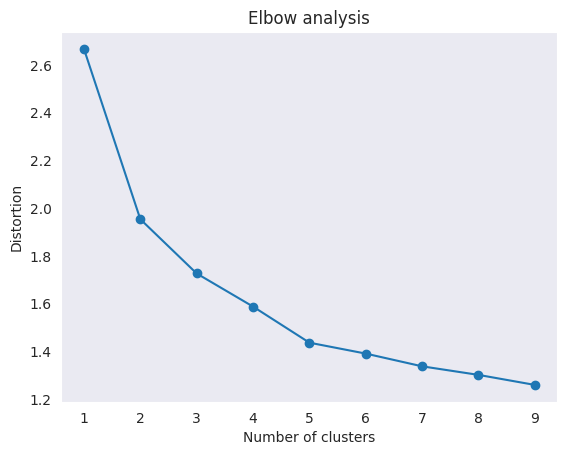

In [46]:
plt.plot(clusters_, distortion, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow analysis')
plt.show()

From the graph, I chose the optimum number of clusters to be 5. Past 5 points, the distortion values are saturated past this point.

In [47]:
model = KMeans(n_clusters = 5)
model.fit(pca_autodev5)
labels = model.labels_
silhouette_score(pca_autodev5, labels)

0.3051535758107235

In [48]:
model.predict(pca_autodev5)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 3, 3, 0, 0, 3, 0,
       0, 0, 3, 1, 1, 1, 1, 0, 0, 3, 3, 4, 4, 4, 3, 1, 1, 1, 1, 1, 1, 1,
       4, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 3, 3, 3, 0, 1, 1, 1, 1, 3, 0, 3, 0,
       0, 3, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 4, 1, 3, 3, 4, 0, 3, 0, 3, 4,
       3, 4, 1, 1, 1, 1, 1, 0, 3, 0, 3, 0, 3, 0, 0, 3, 0, 0, 4, 4, 4, 3,
       1, 1, 1, 1, 4, 4, 3, 4, 4, 4, 1, 3, 3, 3, 0, 3, 3, 0, 3, 0, 4, 0,
       3, 0, 0, 0, 0, 0, 0, 3, 0, 1, 1, 1, 1, 4, 4, 3, 3, 3, 0, 0, 3, 4,
       4, 4, 4, 0, 2, 3, 3, 0, 1, 3, 4, 4, 1, 1, 1, 1, 2, 2, 2, 0, 2, 1,
       4, 1, 1, 4, 4, 4, 4, 1, 1, 1, 1, 0, 0, 0, 0, 3, 2, 2, 3, 4, 0, 0,
       2, 2, 2, 2, 2, 4, 1, 1, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 1, 4, 1, 1,
       3, 3, 2, 2, 0, 0, 0, 0, 4, 4, 0, 4, 2, 2, 4, 4, 2, 4, 4, 4, 4, 1,
       4, 1, 1, 4, 1, 2, 2, 2, 2, 4, 4, 3, 4, 2, 2,

#### **Visualize the data in 2 dimensions using the first two principal components**



<Axes: xlabel='0', ylabel='1'>

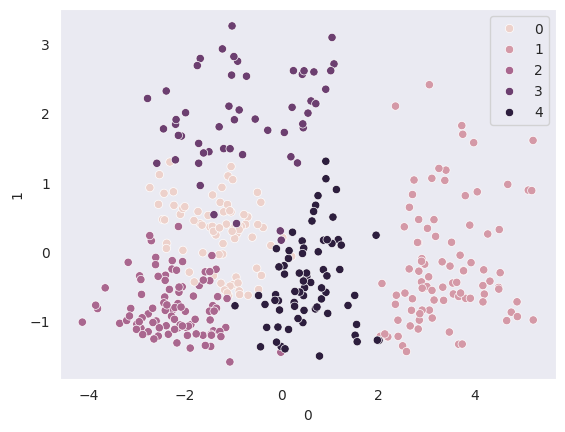

In [49]:
sns.scatterplot(x = pca_autodev5.iloc[:, 0], y = pca_autodev5.iloc[:, 1], hue = labels)

**Observations:**



Now lets look at the cluster to cluster profile.

In [50]:
model_kmeans = model

In [51]:
autodev_kmeans = scaled_autodev4.copy()

In [52]:
autodev_kmeans['cluster'] = labels

In [53]:
autodev_kmeans

,mpg,cylinders,displacement,horsepower,weight,acceleration,car_name2,model_age1,cluster
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,0.244376,1.625315,1
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-0.642619,1.625315,1
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-0.642619,1.625315,1
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-0.642619,1.625315,1
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-0.642619,1.625315,1
...,...,...,...,...,...,...,...,...,...
387,0.455941,-0.864014,-0.520637,-0.480448,-0.221125,0.021294,-0.642619,-1.636410,2
388,2.636813,-0.864014,-0.932079,-1.364896,-0.999134,3.287676,-0.642619,-1.636410,2
389,1.097374,-0.864014,-0.568479,-0.532474,-0.804632,-1.430430,-0.642619,-1.636410,2
390,0.584228,-0.864014,-0.712005,-0.662540,-0.415627,1.110088,-0.642619,-1.636410,2


Now we group by clusters.

In [54]:
autodev_kmeans.groupby('cluster')

In [55]:
cluster_kmeans = autodev_kmeans.groupby('cluster').mean()
cluster_kmeans

,mpg,cylinders,displacement,horsepower,weight,acceleration,car_name2,model_age1
cluster,,,,,,,,
0,0.225675,-0.871444,-0.826524,-0.524571,-0.781742,0.259267,-0.406836,0.634412
1,-1.161022,1.483947,1.494082,1.516135,1.396940,-1.079207,-0.041751,0.698822
2,1.254392,-0.827327,-0.796726,-0.762528,-0.791739,0.391031,-0.467068,-1.157910
3,0.093888,-0.407466,-0.387742,-0.503089,-0.434837,0.325753,1.952665,0.246129
4,-0.504926,0.460907,0.339564,0.011573,0.447576,0.353636,-0.351178,-0.246294


Find out how many data points there are for each cluster

In [56]:
autodev_kmeans.groupby('cluster').count()

,mpg,cylinders,displacement,horsepower,weight,acceleration,car_name2,model_age1
cluster,,,,,,,,
0,79,79,79,79,79,79,79,79
1,93,93,93,93,93,93,93,93
2,96,96,96,96,96,96,96,96
3,54,54,54,54,54,54,54,54
4,70,70,70,70,70,70,70,70


In [57]:
cluster_kmeans['count'] = autodev_kmeans.groupby('cluster').size()
cluster_kmeans

,mpg,cylinders,displacement,horsepower,weight,acceleration,car_name2,model_age1,count
cluster,,,,,,,,,
0,0.225675,-0.871444,-0.826524,-0.524571,-0.781742,0.259267,-0.406836,0.634412,79
1,-1.161022,1.483947,1.494082,1.516135,1.396940,-1.079207,-0.041751,0.698822,93
2,1.254392,-0.827327,-0.796726,-0.762528,-0.791739,0.391031,-0.467068,-1.157910,96
3,0.093888,-0.407466,-0.387742,-0.503089,-0.434837,0.325753,1.952665,0.246129,54
4,-0.504926,0.460907,0.339564,0.011573,0.447576,0.353636,-0.351178,-0.246294,70


In [58]:
num_col = autodev3.select_dtypes(np.number).columns.values
num_col

array(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'car_name2', 'model_age1'], dtype=object)

For characterization, the data has to be selected using a function, as the clusters are randomly selected each time the script is run.

In [59]:
cluster_kmeans.style.highlight_max(color = 'blue')

,mpg,cylinders,displacement,horsepower,weight,acceleration,car_name2,model_age1,count
cluster,,,,,,,,,
0,0.225675,-0.871444,-0.826524,-0.524571,-0.781742,0.259267,-0.406836,0.634412,79
1,-1.161022,1.483947,1.494082,1.516135,1.396940,-1.079207,-0.041751,0.698822,93
2,1.254392,-0.827327,-0.796726,-0.762528,-0.791739,0.391031,-0.467068,-1.157910,96
3,0.093888,-0.407466,-0.387742,-0.503089,-0.434837,0.325753,1.952665,0.246129,54
4,-0.504926,0.460907,0.339564,0.011573,0.447576,0.353636,-0.351178,-0.246294,70


In [60]:
max_mpg_cluster = cluster_kmeans['mpg'].idxmax()
print(f"The cluster with the maximum mpg value is: {max_mpg_cluster}")

max_cylinders_cluster = cluster_kmeans['cylinders'].idxmax()
print(f"The cluster with the maximum cylinder value is: {max_cylinders_cluster}")

max_displacement_cluster = cluster_kmeans['displacement'].idxmax()
print(f"The cluster with the maximum displacement value is: {max_displacement_cluster}")

max_horsepower_cluster = cluster_kmeans['horsepower'].idxmax()
print(f"The cluster with the maximum horsepower value is: {max_horsepower_cluster}")

max_weight_cluster = cluster_kmeans['weight'].idxmax()
print(f"The cluster with the maximum weight value is: {max_weight_cluster}")

max_acceleration_cluster = cluster_kmeans['acceleration'].idxmax()
print(f"The cluster with the maximum acceleration value is: {max_acceleration_cluster}")

max_carname2_cluster = cluster_kmeans['car_name2'].idxmax()
print(f"The cluster with the maximum car name value is: {max_carname2_cluster}")

max_modelage_cluster = cluster_kmeans['model_age1'].idxmax()
print(f"The cluster with the maximum model age value is: {max_modelage_cluster}")

max_count_cluster = cluster_kmeans['count'].idxmax()
print(f"The cluster with the maximum count value is: {max_count_cluster}")


The cluster with the maximum mpg value is: 2
The cluster with the maximum cylinder value is: 1
The cluster with the maximum displacement value is: 1
The cluster with the maximum horsepower value is: 1
The cluster with the maximum weight value is: 1
The cluster with the maximum acceleration value is: 2
The cluster with the maximum car name value is: 3
The cluster with the maximum model age value is: 1
The cluster with the maximum count value is: 2


In [61]:
cluster_kmeans.style.highlight_min(color = 'red')

,mpg,cylinders,displacement,horsepower,weight,acceleration,car_name2,model_age1,count
cluster,,,,,,,,,
0,0.225675,-0.871444,-0.826524,-0.524571,-0.781742,0.259267,-0.406836,0.634412,79
1,-1.161022,1.483947,1.494082,1.516135,1.396940,-1.079207,-0.041751,0.698822,93
2,1.254392,-0.827327,-0.796726,-0.762528,-0.791739,0.391031,-0.467068,-1.157910,96
3,0.093888,-0.407466,-0.387742,-0.503089,-0.434837,0.325753,1.952665,0.246129,54
4,-0.504926,0.460907,0.339564,0.011573,0.447576,0.353636,-0.351178,-0.246294,70


Here, the clusters shown below have the minimum weight and horsepower, and the newest cars. Cluster shown also has the cars that are least repeated in the dataset.

Cluster listed below has the lowest mpg, and the slowest acceleration.

Cluster shown has the least number of cylinders and smallest displacement.

In [62]:
min_mpg_cluster = cluster_kmeans['mpg'].idxmin()
print(f"The cluster with the minimum mpg value is: {min_mpg_cluster}")

min_cylinders_cluster = cluster_kmeans['cylinders'].idxmin()
print(f"The cluster with the minimum cylinder value is: {min_cylinders_cluster}")

min_displacement_cluster = cluster_kmeans['displacement'].idxmin()
print(f"The cluster with the minimum displacement value is: {min_displacement_cluster}")

min_horsepower_cluster = cluster_kmeans['horsepower'].idxmin()
print(f"The cluster with the minimum horsepower value is: {min_horsepower_cluster}")

min_weight_cluster = cluster_kmeans['weight'].idxmin()
print(f"The cluster with the minimum weight value is: {max_weight_cluster}")

min_acceleration_cluster = cluster_kmeans['acceleration'].idxmax()
print(f"The cluster with the minimum acceleration value is: {max_acceleration_cluster}")

min_carname2_cluster = cluster_kmeans['car_name2'].idxmin()
print(f"The cluster with the minimum car name value is: {min_carname2_cluster}")

min_modelage_cluster = cluster_kmeans['model_age1'].idxmin()
print(f"The cluster with the minimum model age value is: {min_modelage_cluster}")

min_count_cluster = cluster_kmeans['count'].idxmax()
print(f"The cluster with the minimum count value is: {min_count_cluster}")


The cluster with the minimum mpg value is: 1
The cluster with the minimum cylinder value is: 0
The cluster with the minimum displacement value is: 0
The cluster with the minimum horsepower value is: 2
The cluster with the minimum weight value is: 1
The cluster with the minimum acceleration value is: 2
The cluster with the minimum car name value is: 2
The cluster with the minimum model age value is: 2
The cluster with the minimum count value is: 2


In [63]:
num_col = autodev3.select_dtypes(np.number).columns.values
num_col

array(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'car_name2', 'model_age1'], dtype=object)

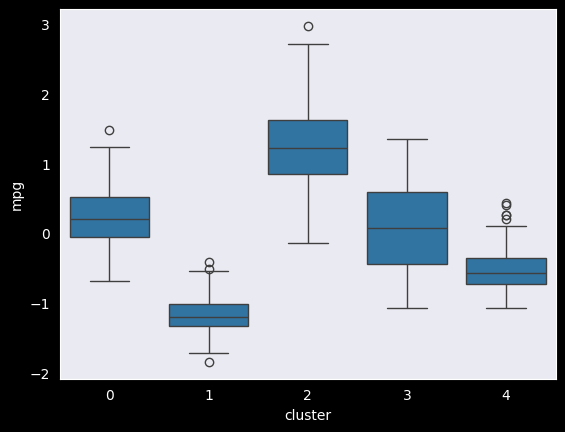

In [64]:
plt.figure(facecolor='black')
sns.boxplot(autodev_kmeans, x='cluster', y='mpg')
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('cluster', color='white')
plt.ylabel('mpg', color='white')
plt.show()

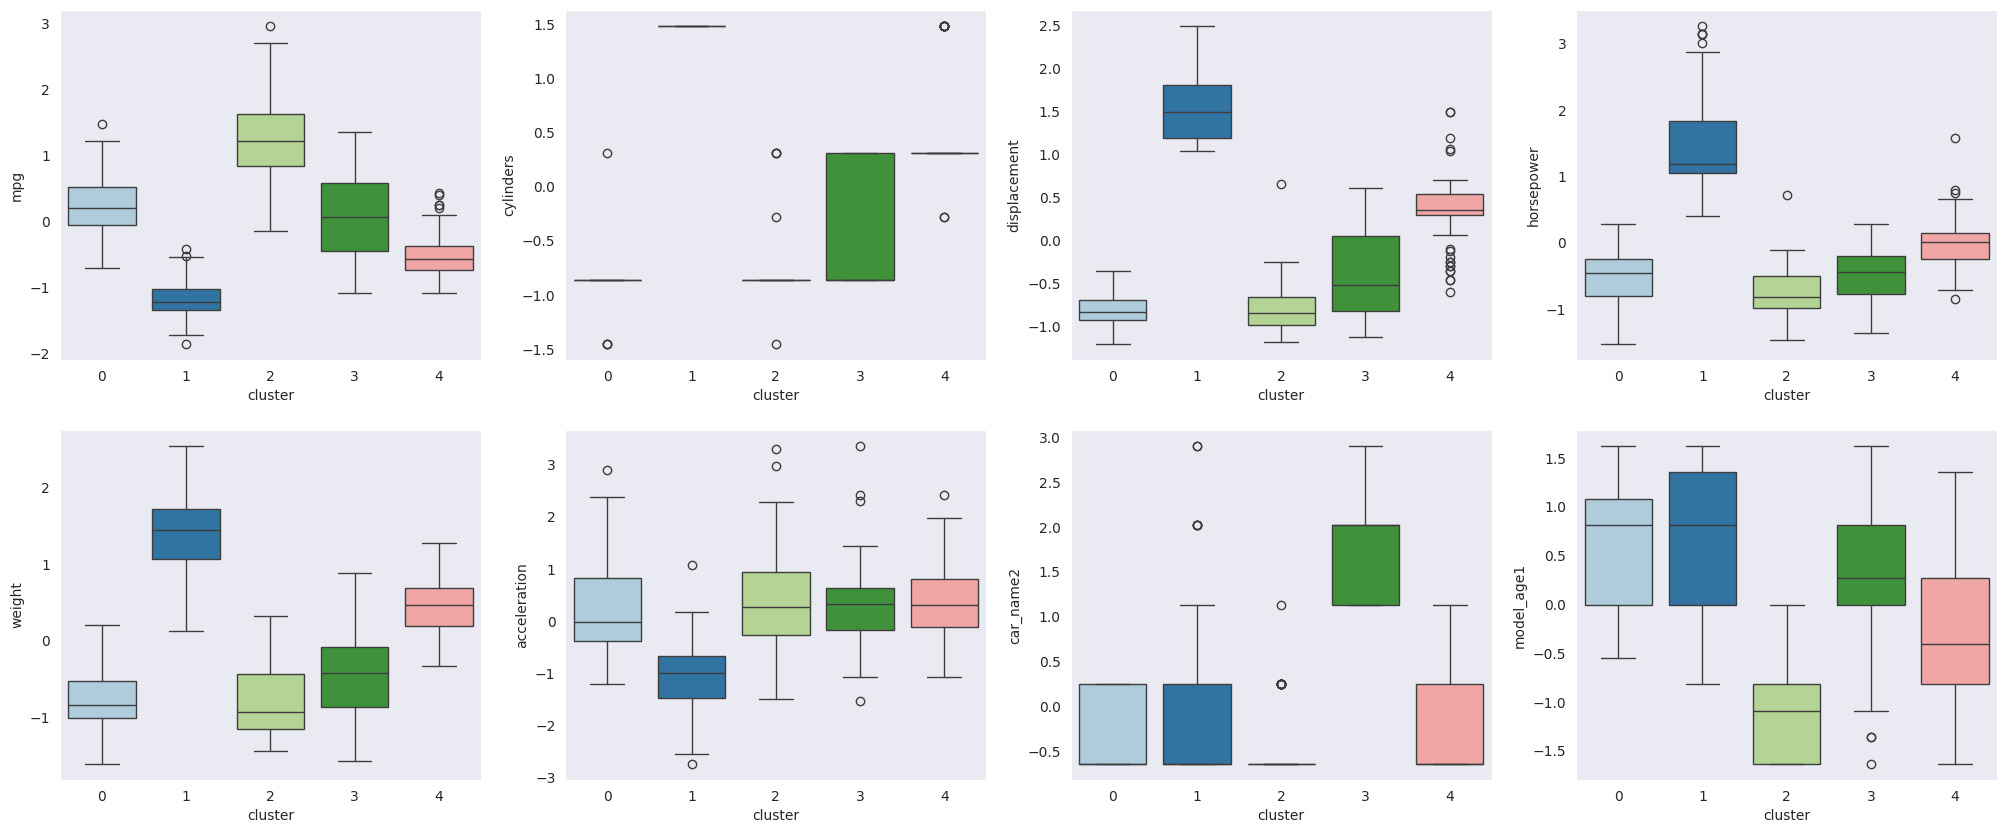

In [65]:
fig, ax = plt.subplots(2, 4, figsize=(25, 10))

for i in range(2):
  for j in range(4):
    sns.boxplot(data=autodev_kmeans, x='cluster', y=num_col[4*i+j], ax=ax[i][j], palette='Paired')
plt.show()

**Observations:___________**

## **t-SNE**

T-SNE is useful for distinguishing which points are close together and which are far apart. It is a probabilistic approach that places data points from high-dimensional spaces to lower dimensional spaces, while preserving the relative closeness of neighbors during dimensionality reduction. Points that are far apart in higher dimenstional spaces are separated and points that are close together remain close, in the low dimenstional space.

In [66]:
from sklearn.manifold import TSNE

Instantiate a manifold and fit it to the principal component scaled data.

In [67]:
tsne = TSNE(n_components=2, perplexity= 50, learning_rate = 200, n_iter=1000, random_state=1)
autodev_tsne = tsne.fit_transform(pca_autodev5)

In [68]:
autodev_tsne = pd.DataFrame(autodev_tsne)
autodev_tsne.head()

,0,1
0,15.912676,11.371897
1,15.747214,12.820432
2,16.079512,12.127356
3,15.770669,12.040116
4,16.180168,11.991198


In [69]:
autodev_tsne.shape

(392, 2)

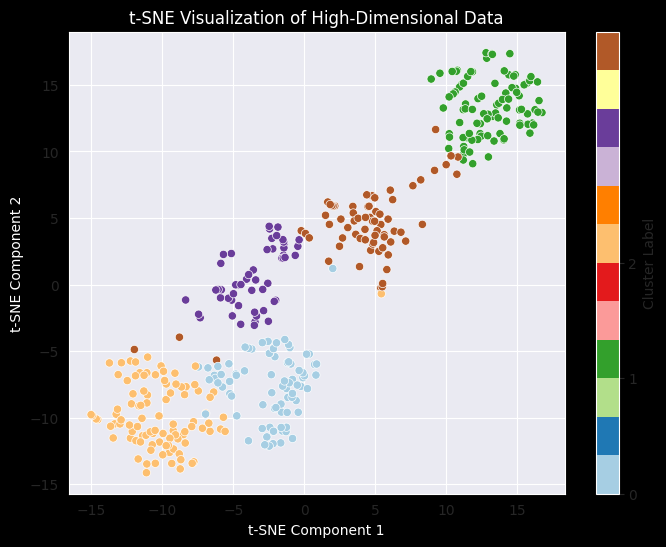

In [70]:
plt.figure(figsize =  (8, 6,), facecolor='black')
scatter_plot = sns.scatterplot(x=autodev_tsne[0], y=autodev_tsne[1], c=autodev_kmeans['cluster'], cmap='Paired')

plt.title('t-SNE Visualization of High-Dimensional Data', color = 'white')
plt.xlabel('t-SNE Component 1', color = 'white')
plt.ylabel('t-SNE Component 2', color = 'white')
plt.colorbar(scatter_plot.collections[0], ticks=[0, 1, 2], label='Cluster Label')
plt.grid(True)
plt.show()

n_components is set to 2, to indicate the reduction to 2D space.
The perplexity is the parameter that relates to the number of effective nearest neighbors.
the learning_rate give the speed of optimization.
the n_iter tells the number of iterations for optimization.
The random_state ensures the reproducibility of the results.

#### **Visualize the clusters w.r.t different variables using scatter plot and box plot**

I will look at the scatterplot with respect to different features.

For characterization, the data has to be selected using a function, as the clusters are randomly selected each time the script is run.

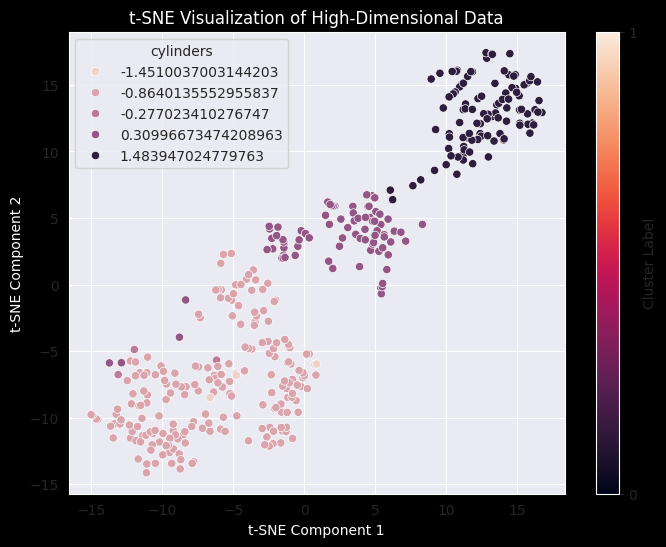

In [71]:
plt.figure(figsize =  (8, 6,), facecolor='black')
scatter_plot = sns.scatterplot(x=autodev_tsne[0], y=autodev_tsne[1], hue=autodev_kmeans.cylinders)

plt.title('t-SNE Visualization of High-Dimensional Data', color = 'white')
plt.xlabel('t-SNE Component 1', color = 'white')
plt.ylabel('t-SNE Component 2', color = 'white')
plt.colorbar(scatter_plot.collections[0], ticks=[0, 1, 2], label='Cluster Label')
plt.grid(True)
plt.show()

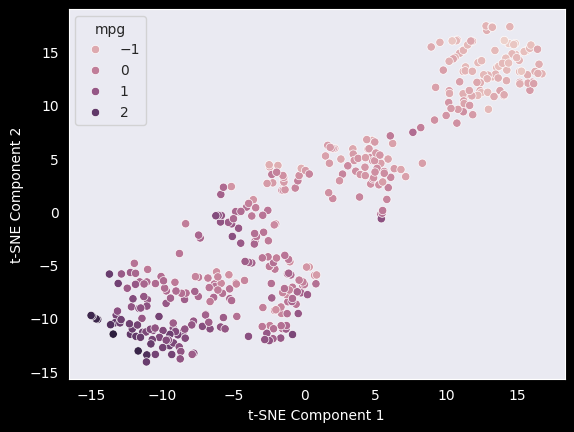

In [72]:
plt.figure(facecolor='black')
sns.scatterplot(x=autodev_tsne[0], y=autodev_tsne[1], hue = autodev_kmeans.mpg)
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('t-SNE Component 1', color = 'white')
plt.ylabel('t-SNE Component 2', color = 'white')
plt.show()

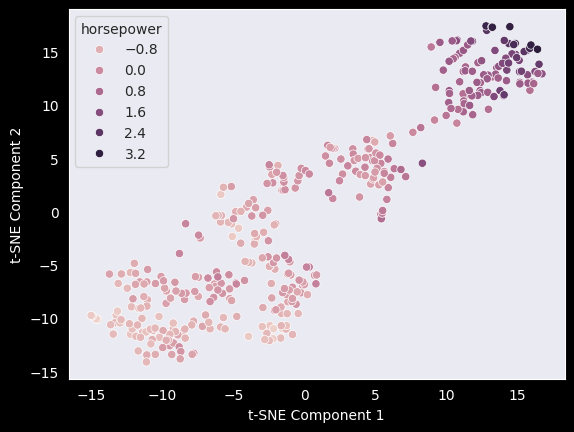

In [73]:
plt.figure(facecolor='black')
sns.scatterplot(x=autodev_tsne[0], y=autodev_tsne[1], hue = autodev_kmeans.horsepower)
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('t-SNE Component 1', color = 'white')
plt.ylabel('t-SNE Component 2', color = 'white')
plt.show()

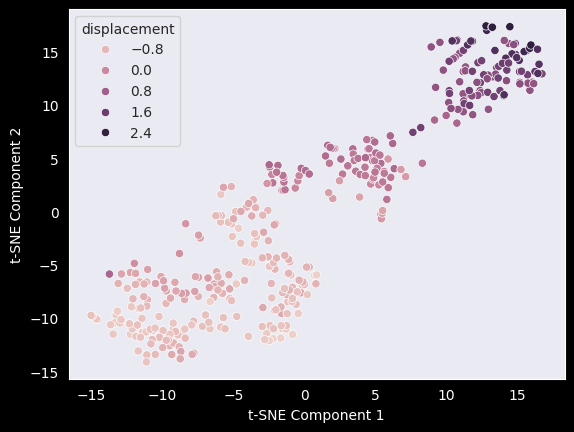

In [74]:
plt.figure(facecolor='black')
sns.scatterplot(x=autodev_tsne[0], y=autodev_tsne[1], hue = autodev_kmeans.displacement)
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('t-SNE Component 1', color = 'white')
plt.ylabel('t-SNE Component 2', color = 'white')
plt.show()

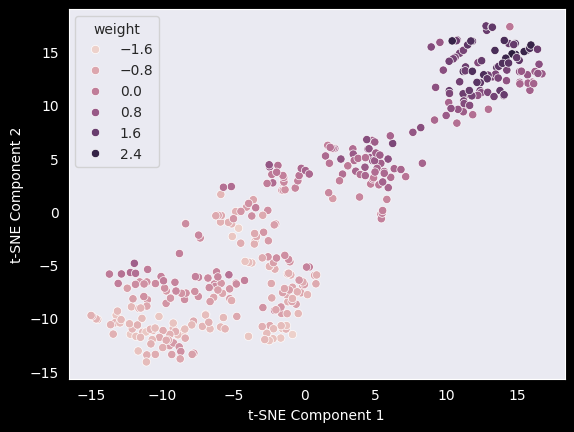

In [75]:
plt.figure(facecolor='black')
sns.scatterplot(x=autodev_tsne[0], y=autodev_tsne[1], hue = autodev_kmeans.weight)
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('t-SNE Component 1', color = 'white')
plt.ylabel('t-SNE Component 2', color = 'white')
plt.show()

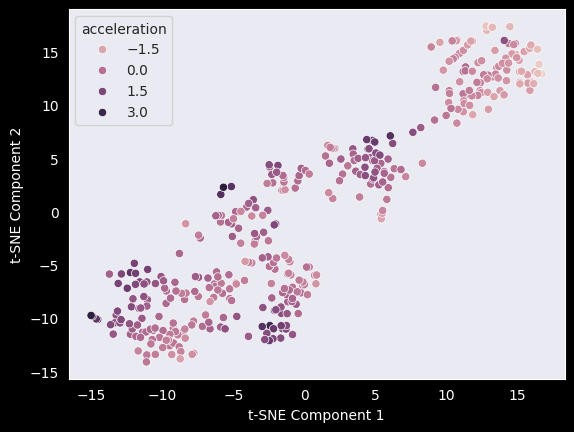

In [76]:
plt.figure(facecolor='black')
sns.scatterplot(x=autodev_tsne[0], y=autodev_tsne[1], hue = autodev_kmeans.acceleration)
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('t-SNE Component 1', color = 'white')
plt.ylabel('t-SNE Component 2', color = 'white')
plt.show()

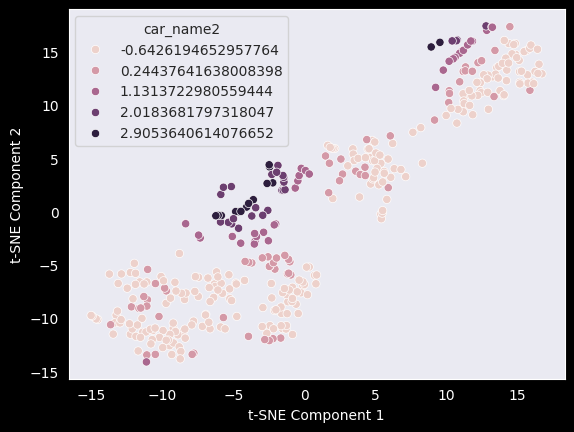

In [77]:
plt.figure(facecolor='black')
sns.scatterplot(x=autodev_tsne[0], y=autodev_tsne[1], hue = autodev_kmeans.car_name2)
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('t-SNE Component 1', color = 'white')
plt.ylabel('t-SNE Component 2', color = 'white')
plt.show()

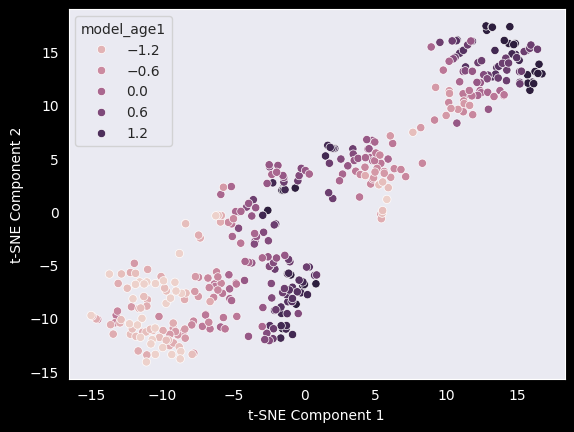

In [78]:
plt.figure(facecolor='black')
sns.scatterplot(x=autodev_tsne[0], y=autodev_tsne[1], hue = autodev_kmeans.model_age1)
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('t-SNE Component 1', color = 'white')
plt.ylabel('t-SNE Component 2', color = 'white')
plt.show()

**Observations:___________**

## **Actionable Insights and Recommendations**

First observations:

-	parameters should be matched to model type and age for meaningful comparison
-	The dependent variable is the miles per gallon (mpg); this is the target, the fuel efficiency of each vehicle
-	The parameters that affect the fuel efficiency are:
-   number of cylinders
-	  displacement, which is the air and fuel displacement within the engine; this is directly correlated to the number of cylinders; the more cylinders the car engine has, the larger the air/fuel displacement, and the larger the displacement, the lower the fuel efficiency; this is also related to horsepower
-	  weight, which negatively affects fuel efficiency, because the more weight a vehicle has, the more power is needed to sustain speed
-	  age, the older the car is, the less fuel efficient it tends to be, as systems wear out, and newer technologies increase the efficiency of newer cars; also, changes in fuel type, to accommodate newer cars can decrease the efficiency of older cars
-	  acceleration, which has a positive correlation to the fuel efficiency in this dataset
- mpg, the efficiency in miles per gallon

This dataset has eight original data columns. I added two more, one column for the number of times a car model appears in the dataset, and the actual age of the car, rather than the year o manufacture.


Statistical Observations:
Most of the variables are numerical data types, either floats or integers. Horsepower, however, and car name are object data-types. Because the first few rows show numbers for the horsepower, this indicates that some of the values in the horsepower series are not numerical. Upon querying the unique values of the horsepow3r, six entries were unknown values and were dropped.

The maximum fuel efficiency (FE) is 46 mpg, while the minimum is 23.5 mpg. At least 75% of the vehicles in this dataset have a fuel efficiency of 29 mpg or less. The average mpg is 23.5 mpg, and there is a standard deviation of 7.8, which means that 68% of the cars have an FE between 15.68 and 31.33 mpg. This points to the max mpg of 46.6 mpg as possibly being an outlier.

Car Names is a categorical feature, but still has value in recommending which vehicle might be suitable given a buyer's preferences, so it has not been permanently dropped, merely excluded from numerical operations.
The age of the car is more pertinent than the year of the model, and more appropriate for data manipulation, so the model year was converted, and the original series dropped.
K-means clustering will be used to model this dataset. However, it may also lend itself to linear regression modeling.


Most vehicles are about 2200 pounds, right above the 25th quartile.


Most of the cars have an acceleration time of about 15.7 seconds. This is a curve that is close to a Gaussian curve, meaning that 68% of the cars fall within one standard deviation, and 95% of the cars fall within two stardard deviations from the mean. The mean is 15.56 seconds, and the standard deviation is 2.76 seconds, so most of the cars have accelerations between 12.94 and 18.46 seconds.

There are two main peaks in horsepower, presumably one for smaller vehicles with a higher number of cylinders, and the other for larger vehicles with a higher number of cylinders.

The displacement should be directly correlated to the horsepower and number of cylinders. About one quarter of the vehicles have the highest horsepower. The data id skewed to the right, telling us that less cars with a high displacement are in the dataset. 50% of the cars have a displacement of 150 cc.

A little more than half of the cars only have instances of one in this dataset.

The miles per gallon has two peaks, one at 17 mpg and the other at 24 mpg. The most cars with the 17 mpg is at the 25th percentile. The data has a skew to the right.

245 cars are listed only once in this dataset. 68 are listed twice. 36 are listed three times. 28 are listed four times and 15 are listed five times.

62.5% of the cars are only listed once.

The age category with the most cars is 52 years.

Half of the of cars, 50.8%, have 4 cylinders.

Four cylinder cars are the most fuel-efficient, with an average mpg of 29.28 mpg.

The lighter the car, the more fuel-efficient it is.

The more powerful the engine of a car, the more fuel it comsumes, and the less fuel efficient it is.

The faster the acceleration a car can achieve, the more fuel-efficient it is.

The age of cars with the most examples in this dataset are 52 years old.

The majority of cars, 50.8% have 4 cylinders.

The larger the displacement a car has, the less fuel-efficient it is.

The older the car, the less fuel efficient it is.

For cars that appear five times, the toyota corolla is the most fuel efficient at 31.12 mpg. For cars that appear four times, the chevrolette chevelle is the most fuel efficient at 30.4 mpg. For cars that appear three times, the honda civic is the most fuel-efficient, at 31.67 mpg. For cars that appear twice, the datsun 210 is the most fuel-efficient, at 36.3. For cars that appear only once, the most fuel efficient is 46.6 mpg.

The car with the highest fuel efficiency is the mazda glc.

We can see that there is a strong,negative correlation between the mpg and the number of cylinders. This should hold true for displacement and horsepower, as these three variables are all related to the size of the engine in the vehicle. The bigger and more powerful the engine, the more fuel it consumes, which lowers its fuel efficiency. Likewise, the weight has a negative effect - the heavier the vehicle, the more fuel is required to make it move.
We therefore expect and find a negative correlatioin between the weight and acceleration.
Age also has a negative correlation to the fuel efficiency, as older technologies were heavier, and the grade of gasoline has changed. The grade of motor oil used to lubricate the engines has also changed, lending to the efficiency of newer cars, so the older the car, the less fuel efficient we expect it to be.
There are very strong correlations between certain variables, making the use of linear regression unfavorable. Kmeans-Clustering might provide much more interpretable and actionable results.
I perform principal component analysis, especially since many of these features have strong correlations, as seen by our pairplot and correlation heatmaps. Principal Component Analysis shows how the variance is spread for the principal components. The first component is in the direction in which the data varies the most, or the spread from the mean is the biggest. The second component lies in the direction that the spread from the mean is the second biggest.

The first three components represent 86% of the variatio of the data. The first four components represent 95% of the variation of the data. Therefore everything after the first five columns can be dropped to reduce dimensionality.

Here, we see that cluster zero has the maximum mpg and maximum acceleration.
Cluster one has the maximum cylinders, displacement, horsepower and weight, the oldest models and the largest number of data points.
Cluster four has the maximum number of repeated car names.
Clusters two and three have no maxima.

Here, cluster zero has the minimum wweight and horsepower, and the newest cars. Cluster zero also has the cars that are least repeated in the dataset.
Cluster one has the lowest mpg, and the slowest acceleration.
Cluster two has the least number of cylinders and smallest displacement.
Cluster three has no minima.
Cluster four has the fewest cars.

T-SNE is useful for distinguishing which points are close together and which are far apart. It is a probabilistic approach that places data points from high-dimensional spaces to lower dimensional spaces, while preserving the relative closeness of neighbors during dimensionality reduction. Points that are far apart in higher dimenstional spaces are separated and points that are close together remain close, in the low dimenstional space.

n_components is set to 2, to indicate the reduction to 2D space. The perplexity is the parameter that relates to the number of effective nearest neighbors. the learning_rate give the speed of optimization. the n_iter tells the number of iterations for optimization. The random_state ensures the reproducibility of the results.




# Part 2: K-Medoids and GMM

# K-Medoids

In kmedoids, the center of each cluster is constrained to be one of the actual datapoints



In [79]:
!pip install scikit-learn-extra

In [80]:
# Downgrade numpy to a version compatible with scikit-learn-extra
#!pip uninstall numpy -y
#!pip install numpy<2
!pip install numpy==1.26.4

# Reinstall scikit-learn-extra to ensure compatibility
!pip install scikit-learn-extra

In [81]:
from sklearn_extra.cluster import KMedoids

In [82]:
model_kmedoids = KMedoids(n_clusters=5, random_state=0)
model_kmedoids.fit(pca_autodev5)
model_kmedoids


KMedoids(n_clusters=5, random_state=0)

In [83]:
labels = model_kmedoids.labels_
print(labels, '\n\n')
model_kmedoids.cluster_centers_

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 2 1 1 2 1 1 1 2 0 0 0 0 1 1 2 2 4 4 4 2
 0 0 0 0 0 0 0 4 1 4 4 1 1 1 1 1 1 1 1 1 1 1 2 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 4 4 2 2 2 1 0 0 0 0 2 1 2 1 1
 2 1 1 0 0 1 1 1 1 0 1 4 0 2 2 4 1 2 1 2 4 2 4 0 0 0 0 0 1 2 1 2 1 2 1 1 2
 1 1 4 4 4 2 0 0 0 0 4 4 2 4 4 4 0 2 2 2 1 2 2 1 2 1 4 1 2 1 1 1 1 1 1 2 1
 0 0 0 0 4 4 2 2 2 1 1 2 4 4 4 4 1 3 2 2 1 0 2 4 4 0 0 0 0 3 3 3 1 3 0 4 0
 0 4 4 4 4 0 0 0 0 3 1 1 1 2 3 3 2 4 1 1 3 3 3 3 3 4 4 4 4 4 4 1 4 4 4 4 4
 4 0 4 4 0 2 2 3 3 1 4 4 1 4 4 1 4 3 3 4 4 4 4 4 0 4 0 4 0 0 4 0 3 3 3 3 4
 4 2 4 3 3 3 3 3 4 4 3 3 3 2 3 2 3 4 4 3 3 3 3 2 3 2 3 3 3 3 3 3 3 3 4 3 3
 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 4 4 4 4 4 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 2 3 3 3 4 3 3 4 3 3 3 3 3 3 3 3] 




array([[ 3.51212145,  0.13040682, -0.17183872,  0.02053995,  0.04644292,
         0.021766  ,  0.15658171, -0.07868859],
       [-1.21489652,  0.11176339,  1.40879988,  0.33933816, -0.08919639,
         0.11621907, -0.03578619, -0.10094859],
       [-0.88097774,  2.04363953, -0.60980732, -0.18697074, -0.50604181,
         0.39122403,  0.24849072, -0.18856351],
       [-2.28161978, -0.93777838,  0.11647353, -0.60554675,  0.16693637,
         0.11732754,  0.00634726, -0.05835421],
       [ 0.46032366, -0.85435114, -0.40630855,  0.27944991, -0.22753144,
        -0.21537382,  0.11746519,  0.05969153]])

In [84]:
pd.DataFrame(model_kmedoids.cluster_centers_)

,0,1,2,3,4,5,6,7
0,3.512121,0.130407,-0.171839,0.020540,0.046443,0.021766,0.156582,-0.078689
1,-1.214897,0.111763,1.408800,0.339338,-0.089196,0.116219,-0.035786,-0.100949
2,-0.880978,2.043640,-0.609807,-0.186971,-0.506042,0.391224,0.248491,-0.188564
3,-2.281620,-0.937778,0.116474,-0.605547,0.166936,0.117328,0.006347,-0.058354
4,0.460324,-0.854351,-0.406309,0.279450,-0.227531,-0.215374,0.117465,0.059692


In [85]:
pca.inverse_transform(model_kmedoids.cluster_centers_)

array([[-1.34007146,  1.48394702,  1.49830011,  1.39250213,  1.63313178,
        -0.92232677,  0.24437642,  0.80988409],
       [ 0.32765448, -0.86401356, -0.92251057, -0.37639497, -0.8399961 ,
        -0.01499869, -0.64261947,  0.80988409],
       [-0.05720536, -0.86401356, -0.7120053 , -0.42842136, -0.02426469,
         0.52939816,  2.01836818,  0.26626326],
       [ 1.39243334, -0.86401356, -0.932079  , -0.68855328, -0.9307639 ,
         0.09388068, -0.64261947, -1.09278881],
       [-0.36509322,  0.30996673,  0.35008951,  0.01380292,  0.47436882,
         0.09388068, -0.64261947, -0.54916798]])

In [86]:
cluster_points = pd.DataFrame(scaler.inverse_transform(pca.inverse_transform(model_kmedoids.cluster_centers_)), columns = num_col)
cluster_points

,mpg,cylinders,displacement,horsepower,weight,acceleration,car_name2,model_age1
0,13.0,8.0,351.0,158.0,4363.0,13.0,2.0,52.0
1,26.0,4.0,98.0,90.0,2265.0,15.5,1.0,52.0
2,23.0,4.0,120.0,88.0,2957.0,17.0,4.0,50.0
3,34.3,4.0,97.0,78.0,2188.0,15.8,1.0,45.0
4,20.6,6.0,231.0,105.0,3380.0,15.8,1.0,47.0


Show that this point actually exists in the dataset.

In [87]:
matched_rows = autodev3[(autodev3['mpg']==13) & (autodev3['cylinders']==8) & (autodev3['displacement']==351)]
matched_rows

,mpg,cylinders,displacement,horsepower,weight,acceleration,car_name2,model_age1
92,13.0,8,351.0,158,4363,13.0,2,52


In [88]:
autodev3[(autodev3['mpg']==26) & (autodev3['cylinders']==4) & (autodev3['displacement']==98) & (autodev3['horsepower']==90)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,car_name2,model_age1
114,26.0,4,98.0,90,2265,15.5,1,52


In [89]:
autodev3[(autodev3['mpg']==23) & (autodev3['cylinders']==4) & (autodev3['displacement']==120) & (autodev3['horsepower']==88)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,car_name2,model_age1
178,23.0,4,120.0,88,2957,17.0,4,50


In [90]:
autodev3[(autodev3['mpg']==20.6) & (autodev3['cylinders']==6) & (autodev3['displacement']==97) & (autodev3['horsepower']==78)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,car_name2,model_age1


In [91]:
autodev3[(autodev3['mpg']==23) & (autodev3['cylinders']==4) & (autodev3['displacement']==231) & (autodev3['horsepower']==105)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,car_name2,model_age1


All points are in the dataset

In [93]:
autodev3_kmedoids = scaled_autodev4.copy()
autodev3_kmedoids['cluster'] = labels
autodev3_kmedoids

,mpg,cylinders,displacement,horsepower,weight,acceleration,car_name2,model_age1,cluster
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,0.244376,1.625315,0
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-0.642619,1.625315,0
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-0.642619,1.625315,0
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-0.642619,1.625315,0
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-0.642619,1.625315,0
...,...,...,...,...,...,...,...,...,...
387,0.455941,-0.864014,-0.520637,-0.480448,-0.221125,0.021294,-0.642619,-1.636410,3
388,2.636813,-0.864014,-0.932079,-1.364896,-0.999134,3.287676,-0.642619,-1.636410,3
389,1.097374,-0.864014,-0.568479,-0.532474,-0.804632,-1.430430,-0.642619,-1.636410,3
390,0.584228,-0.864014,-0.712005,-0.662540,-0.415627,1.110088,-0.642619,-1.636410,3


In [94]:
profile_kmedoids = autodev3_kmedoids.groupby('cluster').mean()
profile_kmedoids

,mpg,cylinders,displacement,horsepower,weight,acceleration,car_name2,model_age1
cluster,,,,,,,,
0,-1.177810,1.483947,1.502927,1.526856,1.418382,-1.065904,-0.009051,0.723263
1,0.225025,-0.871737,-0.836584,-0.529736,-0.790998,0.259110,-0.397528,0.677555
2,0.084157,-0.435059,-0.394775,-0.530473,-0.437163,0.388413,1.984253,0.297626
3,1.276429,-0.839035,-0.810947,-0.785134,-0.819969,0.386928,-0.472769,-1.153512
4,-0.433946,0.413990,0.298372,0.034218,0.390540,0.262483,-0.350697,-0.308323


In [95]:
profile_kmedoids['count'] = autodev3_kmedoids.groupby('cluster').size()
profile_kmedoids


,mpg,cylinders,displacement,horsepower,weight,acceleration,car_name2,model_age1,count
cluster,,,,,,,,,
0,-1.177810,1.483947,1.502927,1.526856,1.418382,-1.065904,-0.009051,0.723263,91
1,0.225025,-0.871737,-0.836584,-0.529736,-0.790998,0.259110,-0.397528,0.677555,76
2,0.084157,-0.435059,-0.394775,-0.530473,-0.437163,0.388413,1.984253,0.297626,52
3,1.276429,-0.839035,-0.810947,-0.785134,-0.819969,0.386928,-0.472769,-1.153512,94
4,-0.433946,0.413990,0.298372,0.034218,0.390540,0.262483,-0.350697,-0.308323,79


For characterization, the data has to be selected using a function, as the clusters are randomly selected each time the script is run.

In [96]:
profile_kmedoids.style.highlight_max(color = 'blue')

,mpg,cylinders,displacement,horsepower,weight,acceleration,car_name2,model_age1,count
cluster,,,,,,,,,
0,-1.177810,1.483947,1.502927,1.526856,1.418382,-1.065904,-0.009051,0.723263,91
1,0.225025,-0.871737,-0.836584,-0.529736,-0.790998,0.259110,-0.397528,0.677555,76
2,0.084157,-0.435059,-0.394775,-0.530473,-0.437163,0.388413,1.984253,0.297626,52
3,1.276429,-0.839035,-0.810947,-0.785134,-0.819969,0.386928,-0.472769,-1.153512,94
4,-0.433946,0.413990,0.298372,0.034218,0.390540,0.262483,-0.350697,-0.308323,79


In [97]:
max_mpg_cluster = profile_kmedoids['mpg'].idxmax()
print(f"The cluster with the maximum mpg value is: {max_mpg_cluster}")

max_cylinders_cluster = profile_kmedoids['cylinders'].idxmax()
print(f"The cluster with the maximum cylinder value is: {max_cylinders_cluster}")

max_displacement_cluster = profile_kmedoids['displacement'].idxmax()
print(f"The cluster with the maximum displacement value is: {max_displacement_cluster}")

max_horsepower_cluster = profile_kmedoids['horsepower'].idxmax()
print(f"The cluster with the maximum horsepower value is: {max_horsepower_cluster}")

max_weight_cluster = profile_kmedoids['weight'].idxmax()
print(f"The cluster with the maximum weight value is: {max_weight_cluster}")

max_acceleration_cluster = profile_kmedoids['acceleration'].idxmax()
print(f"The cluster with the maximum acceleration value is: {max_acceleration_cluster}")

max_carname2_cluster = profile_kmedoids['car_name2'].idxmax()
print(f"The cluster with the maximum car name value is: {max_carname2_cluster}")

max_modelage_cluster = profile_kmedoids['model_age1'].idxmax()
print(f"The cluster with the maximum model age value is: {max_modelage_cluster}")

max_count_cluster = profile_kmedoids['count'].idxmax()
print(f"The cluster with the maximum count value is: {max_count_cluster}")


The cluster with the maximum mpg value is: 3
The cluster with the maximum cylinder value is: 0
The cluster with the maximum displacement value is: 0
The cluster with the maximum horsepower value is: 0
The cluster with the maximum weight value is: 0
The cluster with the maximum acceleration value is: 2
The cluster with the maximum car name value is: 2
The cluster with the maximum model age value is: 0
The cluster with the maximum count value is: 3


In [98]:
profile_kmedoids.style.highlight_min(color = 'red')

,mpg,cylinders,displacement,horsepower,weight,acceleration,car_name2,model_age1,count
cluster,,,,,,,,,
0,-1.177810,1.483947,1.502927,1.526856,1.418382,-1.065904,-0.009051,0.723263,91
1,0.225025,-0.871737,-0.836584,-0.529736,-0.790998,0.259110,-0.397528,0.677555,76
2,0.084157,-0.435059,-0.394775,-0.530473,-0.437163,0.388413,1.984253,0.297626,52
3,1.276429,-0.839035,-0.810947,-0.785134,-0.819969,0.386928,-0.472769,-1.153512,94
4,-0.433946,0.413990,0.298372,0.034218,0.390540,0.262483,-0.350697,-0.308323,79


In [99]:
min_mpg_cluster = profile_kmedoids['mpg'].idxmin()
print(f"The cluster with the minimum mpg value is: {min_mpg_cluster}")

min_cylinders_cluster = profile_kmedoids['cylinders'].idxmin()
print(f"The cluster with the minimum cylinder value is: {min_cylinders_cluster}")

min_displacement_cluster = profile_kmedoids['displacement'].idxmin()
print(f"The cluster with the minimum displacement value is: {min_displacement_cluster}")

min_horsepower_cluster = profile_kmedoids['horsepower'].idxmin()
print(f"The cluster with the minimum horsepower value is: {min_horsepower_cluster}")

min_weight_cluster = profile_kmedoids['weight'].idxmin()
print(f"The cluster with the minimum weight value is: {max_weight_cluster}")

min_acceleration_cluster = profile_kmedoids['acceleration'].idxmax()
print(f"The cluster with the minimum acceleration value is: {max_acceleration_cluster}")

min_carname2_cluster = profile_kmedoids['car_name2'].idxmin()
print(f"The cluster with the minimum car name value is: {min_carname2_cluster}")

min_modelage_cluster = profile_kmedoids['model_age1'].idxmin()
print(f"The cluster with the minimum model age value is: {min_modelage_cluster}")

min_count_cluster = profile_kmedoids['count'].idxmax()
print(f"The cluster with the minimum count value is: {min_count_cluster}")


The cluster with the minimum mpg value is: 0
The cluster with the minimum cylinder value is: 1
The cluster with the minimum displacement value is: 1
The cluster with the minimum horsepower value is: 3
The cluster with the minimum weight value is: 0
The cluster with the minimum acceleration value is: 2
The cluster with the minimum car name value is: 3
The cluster with the minimum model age value is: 3
The cluster with the minimum count value is: 3


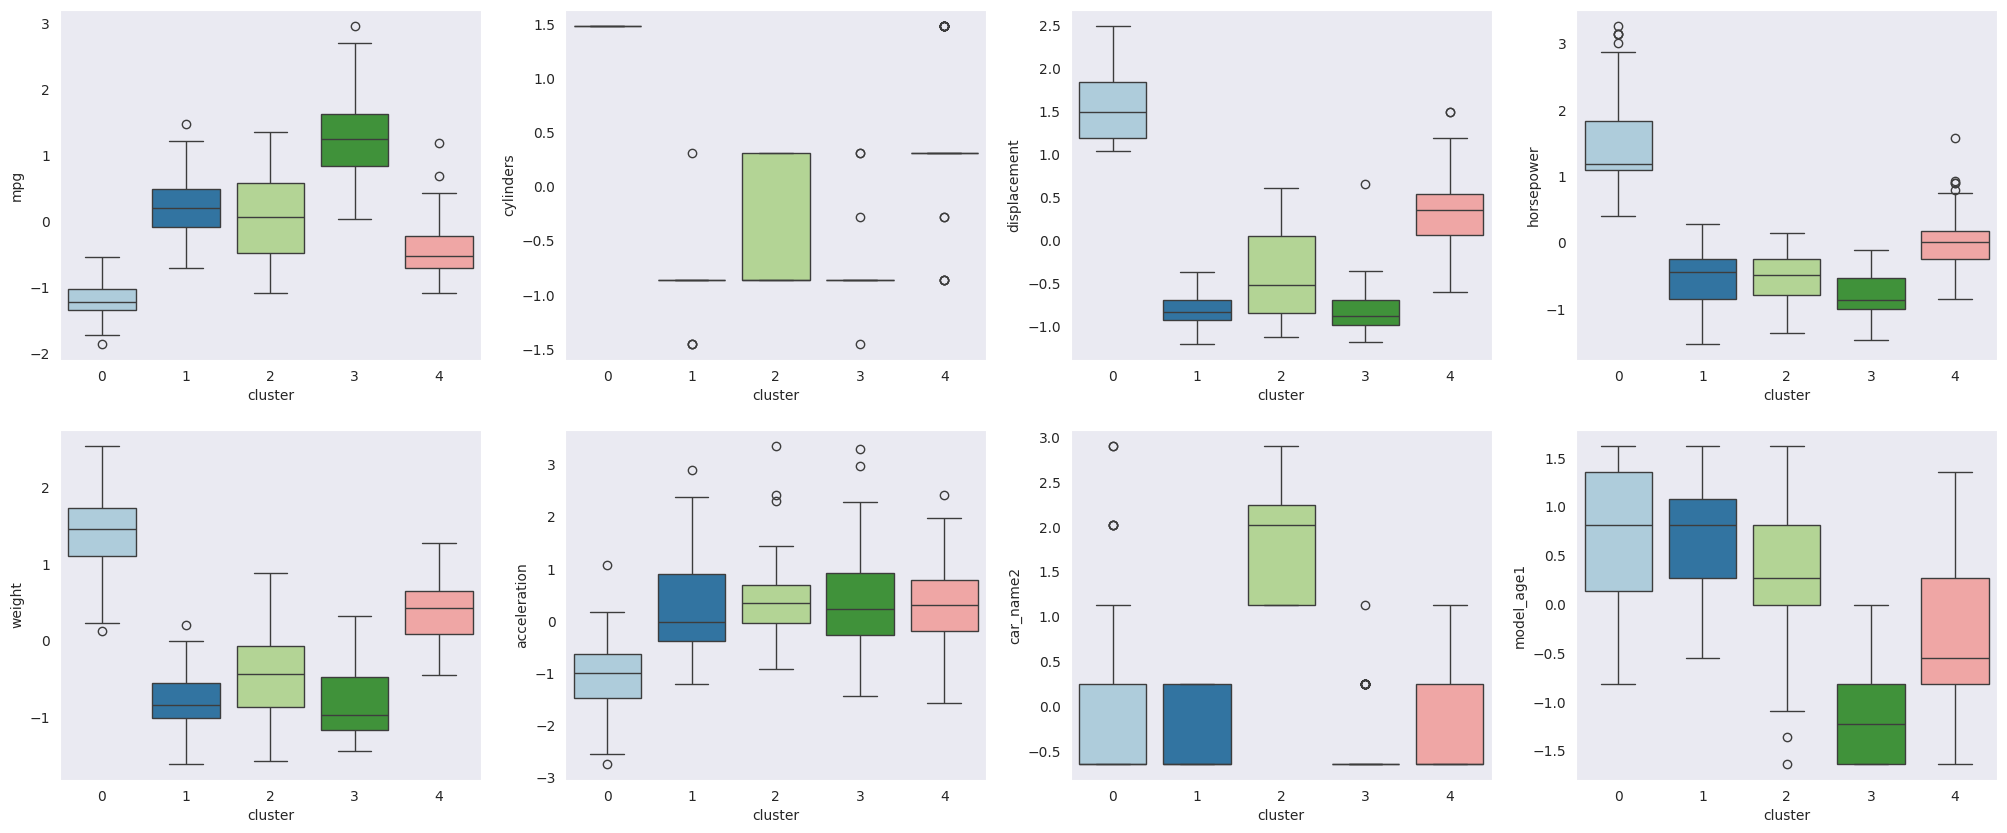

In [100]:
fig, ax = plt.subplots(2, 4, figsize=(25, 10))
for i in range(2):
  for j in range(4):
    sns.boxplot(data=autodev3_kmedoids, x='cluster', y=num_col[4*i+j], ax=ax[i][j], palette='Paired')

plt.show()


Conclusion:


GMM

In [101]:
from sklearn.mixture import GaussianMixture


In [102]:
model_gmm = GaussianMixture(n_components=5, random_state=0)
model_gmm.fit(pca_autodev5)


GaussianMixture(n_components=5, random_state=0)

In [103]:
model_gmm.predict(pca_autodev5)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 4, 0, 4, 0,
       0, 0, 2, 1, 1, 1, 1, 4, 0, 4, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 0, 2, 2, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 4, 0,
       3, 4, 2, 0, 1, 1, 4, 4, 4, 0, 1, 4, 2, 1, 2, 2, 2, 0, 4, 4, 4, 2,
       2, 2, 1, 1, 1, 1, 1, 0, 4, 4, 4, 4, 4, 4, 0, 4, 4, 0, 2, 2, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 4, 4, 2, 0, 4, 4, 4, 2, 4, 2, 4,
       4, 0, 4, 4, 0, 4, 0, 4, 0, 1, 1, 1, 1, 2, 2, 2, 2, 4, 0, 4, 4, 2,
       2, 2, 2, 4, 0, 4, 4, 0, 1, 4, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 4, 0, 4, 4, 2, 0, 3,
       0, 0, 0, 0, 4, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 3, 1, 1,
       4, 4, 0, 0, 0, 0, 0, 0, 3, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 3, 3, 4, 3, 0, 0,

In [104]:
autodev3_gmm = scaled_autodev4.copy()
autodev3_gmm['cluster'] = model_gmm.predict(pca_autodev5)
autodev3_gmm

,mpg,cylinders,displacement,horsepower,weight,acceleration,car_name2,model_age1,cluster
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,0.244376,1.625315,1
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-0.642619,1.625315,1
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-0.642619,1.625315,1
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-0.642619,1.625315,1
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-0.642619,1.625315,1
...,...,...,...,...,...,...,...,...,...
387,0.455941,-0.864014,-0.520637,-0.480448,-0.221125,0.021294,-0.642619,-1.636410,0
388,2.636813,-0.864014,-0.932079,-1.364896,-0.999134,3.287676,-0.642619,-1.636410,0
389,1.097374,-0.864014,-0.568479,-0.532474,-0.804632,-1.430430,-0.642619,-1.636410,0
390,0.584228,-0.864014,-0.712005,-0.662540,-0.415627,1.110088,-0.642619,-1.636410,0


In [105]:
profile_gmm = autodev3_gmm.groupby('cluster').mean()
profile_gmm['count'] = autodev3_gmm.groupby('cluster').size()
profile_gmm

,mpg,cylinders,displacement,horsepower,weight,acceleration,car_name2,model_age1,count
cluster,,,,,,,,,
0,0.818578,-0.864014,-0.812474,-0.673601,-0.793048,0.399657,-0.642619,-0.388650,127
1,-1.124935,1.483947,1.448162,1.440627,1.355771,-1.010156,-0.057202,0.611462,100
2,-0.509131,0.309967,0.237327,-0.094201,0.268839,0.275346,0.266832,0.066706,79
3,0.262595,-0.067384,-0.157720,-0.075385,0.066756,0.293493,-0.579263,-0.685073,14
4,0.626099,-0.864014,-0.807955,-0.694695,-0.792124,0.338859,1.032817,-0.103701,72


For characterization, the data has to be selected using a function, as the clusters are randomly selected each time the script is run.

In [106]:
profile_gmm.style.highlight_max(color = 'blue')

,mpg,cylinders,displacement,horsepower,weight,acceleration,car_name2,model_age1,count
cluster,,,,,,,,,
0,0.818578,-0.864014,-0.812474,-0.673601,-0.793048,0.399657,-0.642619,-0.388650,127
1,-1.124935,1.483947,1.448162,1.440627,1.355771,-1.010156,-0.057202,0.611462,100
2,-0.509131,0.309967,0.237327,-0.094201,0.268839,0.275346,0.266832,0.066706,79
3,0.262595,-0.067384,-0.157720,-0.075385,0.066756,0.293493,-0.579263,-0.685073,14
4,0.626099,-0.864014,-0.807955,-0.694695,-0.792124,0.338859,1.032817,-0.103701,72


In [107]:
max_mpg_cluster = profile_gmm['mpg'].idxmax()
print(f"The cluster with the maximum mpg value is: {max_mpg_cluster}")

max_cylinders_cluster = profile_gmm['cylinders'].idxmax()
print(f"The cluster with the maximum cylinder value is: {max_cylinders_cluster}")

max_displacement_cluster = profile_gmm['displacement'].idxmax()
print(f"The cluster with the maximum displacement value is: {max_displacement_cluster}")

max_horsepower_cluster = profile_gmm['horsepower'].idxmax()
print(f"The cluster with the maximum horsepower value is: {max_horsepower_cluster}")

max_weight_cluster = profile_gmm['weight'].idxmax()
print(f"The cluster with the maximum weight value is: {max_weight_cluster}")

max_acceleration_cluster = profile_gmm['acceleration'].idxmax()
print(f"The cluster with the maximum acceleration value is: {max_acceleration_cluster}")

max_carname2_cluster = profile_gmm['car_name2'].idxmax()
print(f"The cluster with the maximum car name value is: {max_carname2_cluster}")

max_modelage_cluster = profile_gmm['model_age1'].idxmax()
print(f"The cluster with the maximum model age value is: {max_modelage_cluster}")

max_count_cluster = profile_gmm['count'].idxmax()
print(f"The cluster with the maximum count value is: {max_count_cluster}")


The cluster with the maximum mpg value is: 0
The cluster with the maximum cylinder value is: 1
The cluster with the maximum displacement value is: 1
The cluster with the maximum horsepower value is: 1
The cluster with the maximum weight value is: 1
The cluster with the maximum acceleration value is: 0
The cluster with the maximum car name value is: 4
The cluster with the maximum model age value is: 1
The cluster with the maximum count value is: 0


In [108]:
profile_gmm.style.highlight_min(color = 'red')

,mpg,cylinders,displacement,horsepower,weight,acceleration,car_name2,model_age1,count
cluster,,,,,,,,,
0,0.818578,-0.864014,-0.812474,-0.673601,-0.793048,0.399657,-0.642619,-0.388650,127
1,-1.124935,1.483947,1.448162,1.440627,1.355771,-1.010156,-0.057202,0.611462,100
2,-0.509131,0.309967,0.237327,-0.094201,0.268839,0.275346,0.266832,0.066706,79
3,0.262595,-0.067384,-0.157720,-0.075385,0.066756,0.293493,-0.579263,-0.685073,14
4,0.626099,-0.864014,-0.807955,-0.694695,-0.792124,0.338859,1.032817,-0.103701,72


In [109]:
min_mpg_cluster = profile_gmm['mpg'].idxmin()
print(f"The cluster with the minimum mpg value is: {min_mpg_cluster}")

min_cylinders_cluster = profile_gmm['cylinders'].idxmin()
print(f"The cluster with the minimum cylinder value is: {min_cylinders_cluster}")

min_displacement_cluster = profile_gmm['displacement'].idxmin()
print(f"The cluster with the minimum displacement value is: {min_displacement_cluster}")

min_horsepower_cluster = profile_gmm['horsepower'].idxmin()
print(f"The cluster with the minimum horsepower value is: {min_horsepower_cluster}")

min_weight_cluster = profile_gmm['weight'].idxmin()
print(f"The cluster with the minimum weight value is: {max_weight_cluster}")

min_acceleration_cluster = profile_gmm['acceleration'].idxmax()
print(f"The cluster with the minimum acceleration value is: {max_acceleration_cluster}")

min_carname2_cluster = profile_gmm['car_name2'].idxmin()
print(f"The cluster with the minimum car name value is: {min_carname2_cluster}")

min_modelage_cluster = profile_gmm['model_age1'].idxmin()
print(f"The cluster with the minimum model age value is: {min_modelage_cluster}")

min_count_cluster = profile_gmm['count'].idxmax()
print(f"The cluster with the minimum count value is: {min_count_cluster}")


The cluster with the minimum mpg value is: 1
The cluster with the minimum cylinder value is: 0
The cluster with the minimum displacement value is: 0
The cluster with the minimum horsepower value is: 4
The cluster with the minimum weight value is: 1
The cluster with the minimum acceleration value is: 0
The cluster with the minimum car name value is: 0
The cluster with the minimum model age value is: 3
The cluster with the minimum count value is: 0


Conclusion:
